<a href="https://colab.research.google.com/github/DedeIrsandi666/AnalisisStrategiPemasaran/blob/main/Edulink_Project_2025_Ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Library* Yang digunakan**

Dalam penelitian yang saya lakukan, saya menggunakan beberapa *library* di *Python* untuk membantu proses analisis data dan pengolahan informasi. Berikut penjelasan dari masing-masing *library* yang saya gunakan:


1.   ### `pandas as pd`
Library `pandas` saya gunakan untuk memproses dan menganalisis data, terutama dalam bentuk tabel. Dengan *library* ini, saya bisa membaca *file* dataset, membersihkan data, serta melakukan manipulasi data seperti filter, agregasi, dan penggabungan informasi.



2.   ### `LabelEncoder` dan `StandardScaler` dari `sklearn.preprocessing`
Untuk bagian *preprocessing*, saya menggunakan `LabelEncoder` untuk mengubah data kategori seperti nama atau jenis ke dalam bentuk numerik, karena beberapa algoritma *machine* *learning* hanya bisa membaca data dalam bentuk angka. Kemudian saya juga menggunakan `StandardScaler` untuk menstandarisasi fitur agar berada dalam skala yang sama, sehingga hasil *clustering* yang saya lakukan menjadi lebih akurat.


3. ### `KMeans` dari `sklearn.cluster`  
Saya memakai algoritma `KMeans` untuk melakukan proses *clustering* atau pengelompokan data. Algoritma ini membagi data ke dalam beberapa cluster berdasarkan kemiripan karakteristiknya, yang ditentukan dari jarak ke pusat *cluster* (*centroid*).

4. ### `matplotlib.pyplot as plt` dan `seaborn as sns`  
Untuk memvisualisasikan hasil dari analisis dan *clustering* yang saya lakukan, saya menggunakan dua library ini. `matplotlib` saya gunakan untuk membuat grafik dasar seperti *scatter* *plot* atau grafik garis, sedangkan `seaborn` saya manfaatkan untuk visualisasi yang lebih informatif dan menarik secara tampilan, seperti heatmap dan grafik distribusi.

5. ### `apriori` dan `association_rules` dari `mlxtend.frequent_patterns`  
Selain *clustering*, saya juga melakukan analisis asosiasi menggunakan algoritma Apriori. `apriori` saya gunakan untuk menemukan kombinasi item yang sering muncul bersama (*frequent* *itemsets*), dan `association_rules` saya gunakan untuk menghasilkan aturan asosiasi dari kombinasi tersebut. Ini sangat berguna jika ingin mengetahui pola hubungan antar variabel dalam data saya.


In [ ]:
# import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import files
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


versi python yang digunakan adalah python versi 3.11.12

Dalam penelitian ini, saya menggunakan Google Colab sebagai platform untuk menjalankan kode Python secara online. Karena dataset yang saya gunakan disimpan di Google Drive, saya perlu menghubungkan Google Drive ke Google Colab terlebih dahulu. Untuk itu, saya menggunakan potongan kode berikut:

```python
from google.colab import drive
drive.mount('/content/drive')
```

*Library* `google.colab` ini memungkinkan saya untuk mengakses file yang ada di Google Drive secara langsung dari notebook Colab. Dengan perintah `drive.mount('/content/drive')`, saya bisa mengakses file di Drive saya seolah-olah menjadi bagian dari direktori di Colab. Ini sangat membantu karena saya bisa membaca dataset, menyimpan hasil, dan mengelola file tanpa perlu mengunggah dan mengunduh berulang kali. Selain itu, proses ini juga menjaga efisiensi kerja saya dalam pengolahan data selama penelitian berlangsung.

In [ ]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. *Load Data***
Langkah pertama yang saya lakukan dalam proses analisis data adalah memuat dataset yang saya simpan di Google Drive. Untuk membaca file tersebut, saya menggunakan *library* `pandas` dengan perintah `pd.read_csv()` seperti pada kode berikut:

```python
df = pd.read_csv('/content/drive/MyDrive/File Skripsi/Data_Marketing_edulink_2022-2025_csv.csv')
df
```

Fungsi `read_csv()` dari *library* `pandas` saya gunakan untuk membaca file dengan format CSV (*Comma* *Separated* *Values*). File tersebut berisi data marketing dari Edulink.id dalam rentang tahun 2022 hingga 2025. Dengan fungsi ini, data langsung dimuat ke dalam bentuk *DataFrame*, sehingga memudahkan saya dalam melakukan analisis, pembersihan data, dan visualisasi.

Adapun lokasi *file* dataset saya simpan di Google Drive, dan dapat diakses melalui path berikut ini:

🔗 [Data Pemasaran Edulink.id 2022 - 2025](https://drive.google.com/file/d/16wattzepr11UKX4ajYUJvQCnx5eMALqB/view?usp=drive_link)

In [ ]:
# 1. Load data
df = pd.read_csv('/content/drive/MyDrive/File Skripsi/Data_Marketing_edulink_2022-2025_csv_oke - Data_Marketing_edulink_2022-2025_csv_oke (1).csv')
df

,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Memakai Aplikasi Lain,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
1,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
2,3,Kabupaten Cirebon,26/01/2023,SD,SDIT Tahfizh Sabilul Quran,Tidak Tertarik,A,252,Invalid Number,Irfan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Tidak Ada,Ya
3,4,Kabupaten Cirebon,14/02/2023,SMA,SMA Pesantren Gedongan,Tidak Tertarik,B,68,Connected,Irfan,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak Ada,Ya
4,5,Kabupaten Cirebon,14/02/2023,SMA,SMAS NU Ciledug,Tidak Tertarik,A,579,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,Kota Cirebon,20/01/2025,SMK,SDN KARYA MULYA,Tidak Tertarik,A,353,Connected,Diva & Nanda,Tidak,Ya,Tidak,Ya,Tidak,Ya,Ada,Tidak
93,94,Kota Cirebon,20/01/2025,SMA,SMK Presiden Kota Cirebon,Tertarik,B,500,Connected,Diva & Nanda,Tidak,Ya,Ya,Ya,Tidak,Tidak,Ada,Tidak
94,95,Kabupaten Cirebon,21/01/2025,SMK,MAN 1 Kota Cirebon,Tidak Tertarik,A,1036,Connected,Diva & Nanda,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ada,Tidak
95,96,Kota Cirebon,22/01/2025,SMK,SMK Sultan Agung,Tidak Tertarik,A,800,Connected,Diva & Nanda,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ada,Tidak


# **2. Memeriksan Data Yang digunakan**

Setelah saya berhasil memuat dataset ke dalam bentuk DataFrame menggunakan library `pandas`, saya melakukan pengecekan awal terhadap isi data dengan menggunakan fungsi `df.head()`, seperti pada potongan kode berikut:

```python
df.head()
```

Fungsi `head()` ini saya gunakan untuk menampilkan 5 baris pertama dari dataset. Tujuannya adalah untuk mendapatkan gambaran umum mengenai struktur data, seperti nama kolom, jenis data, dan contoh isi dari masing-masing variabel. Langkah ini penting dilakukan di awal agar saya bisa memahami bentuk data yang akan dianalisis dan sekaligus memastikan bahwa data telah berhasil dimuat dengan benar ke dalam DataFrame.

In [ ]:
# 2. memeriksa 5 baris pertama dataframe
df.head()

,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Memakai Aplikasi Lain,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
1,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
2,3,Kabupaten Cirebon,26/01/2023,SD,SDIT Tahfizh Sabilul Quran,Tidak Tertarik,A,252,Invalid Number,Irfan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Tidak Ada,Ya
3,4,Kabupaten Cirebon,14/02/2023,SMA,SMA Pesantren Gedongan,Tidak Tertarik,B,68,Connected,Irfan,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak Ada,Ya
4,5,Kabupaten Cirebon,14/02/2023,SMA,SMAS NU Ciledug,Tidak Tertarik,A,579,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak


# **3. Data *Cleaning***
Penghapusan Data 'Tidak Tertarik' pada Kolom 'Tertarik'

```python
df = df[df['Tertarik'] != 'Tidak Tertarik']
```

Pada tahap ini, saya melakukan pembersihan data, yaitu dengan menghapus baris-baris yang memiliki nilai 'Tidak Tertarik' pada kolom *Tertarik*. Tujuan saya melakukan ini adalah agar fokus analisis benar-benar tertuju hanya pada sekolah-sekolah yang menunjukkan ketertarikan terhadap produk Edulink.id. Dengan demikian, analisis dan segmentasi yang saya lakukan bisa lebih akurat dan sesuai dengan target sasaran yang diinginkan.

Di dalam proses ini, saya tetap menggunakan library `pandas`, di mana `pandas` berfungsi untuk memudahkan saya dalam pengolahan data tabular. Dengan metode filtering seperti ini (`df[...]`), saya bisa secara efisien menghapus data yang tidak relevan terhadap kebutuhan penelitian.

In [ ]:
# 3. menghapus nilai Tidak Tertarik pada kolom 'Tertarik'
df = df[df['Tertarik'] != 'Tidak Tertarik']
df


,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Memakai Aplikasi Lain,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
1,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
5,6,Kabupaten Cirebon,14/02/2023,SMA,SMAS PGRI Babakan,Tertarik,A,110,Hold/Tertarik,Irfan,Tidak,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak
6,7,Kabupaten Cirebon,15/02/2023,SMK,SMK Ulumudin Susukan,Tertarik,B,75,Hold/Tertarik,Irfan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
8,9,Kabupaten Cirebon,21/02/2023,SMP,SMP ISLAM TERPADU SALMAN,Tertarik,B,205,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
12,13,Kabupaten Cirebon,22/02/2023,SMK,SMK Nasyrul Ulum Gegesik,Tertarik,B,500,Hold/Tertarik,Irfan & Kurniawan,Tidak,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak
15,16,Kabupaten Cirebon,21/02/2023,SMP,SMP TARBIYATUL BANIN,Tertarik,B,112,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
16,17,Kabupaten Cirebon,22/02/2023,SMA,SMA 1 WALED,Tertarik,A,900,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
20,21,Kabupaten Cirebon,24/02/2023,SMA,SMA NEGERI 1 CILEDUG,Tertarik,A,800,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
22,23,Kabupaten Cirebon,25/02/2023,SMA,SMA 1 GEGESIK,Tertarik,A,980,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak


In [ ]:
df.head()

,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Memakai Aplikasi Lain,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
1,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
5,6,Kabupaten Cirebon,14/02/2023,SMA,SMAS PGRI Babakan,Tertarik,A,110,Hold/Tertarik,Irfan,Tidak,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak
6,7,Kabupaten Cirebon,15/02/2023,SMK,SMK Ulumudin Susukan,Tertarik,B,75,Hold/Tertarik,Irfan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
8,9,Kabupaten Cirebon,21/02/2023,SMP,SMP ISLAM TERPADU SALMAN,Tertarik,B,205,Connected,Irfan & Kurniawan,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak


# **4. Pemilihan Kolom yang Relevan**

Setelah memahami struktur data secara keseluruhan, saya melakukan proses seleksi kolom untuk mengambil hanya variabel-variabel yang relevan dengan tujuan penelitian saya. Hal ini saya lakukan agar analisis lebih terfokus dan efisien. Berikut adalah potongan kode yang saya gunakan:

```python
selected_cols = ['Tertarik', 'Akreditasi', 'Jumlah Siswa', 'Digitalisasi', 'Menggunakan Produk Kompetitor',
                 'Punya Aplikasi Sendiri', 'Kendala Harga', 'Kendala SDM', 'Sarana Pendukung', 'Kendala Budaya']
df_selected = df[selected_cols].copy()
```

Dalam proses ini, saya memilih beberapa kolom yang menurut saya paling berpengaruh terhadap minat sekolah dalam bekerja sama atau menggunakan layanan tertentu, seperti kolom 'Tertarik', 'Jumlah Siswa', 'Akreditasi', serta berbagai kendala seperti 'Kendala SDM' dan 'Kendala Harga'. Selain itu, saya juga mempertimbangkan aspek digitalisasi dan apakah sekolah sudah memiliki aplikasi sendiri atau menggunakan produk kompetitor. Saya menyimpan hasil seleksi ini ke dalam DataFrame baru bernama `df_selected`, agar data yang dianalisis lebih terfokus dan tidak tercampur dengan variabel-variabel lain yang kurang relevan.

In [ ]:
# 5. Pemilihan kolom yang relevan
selected_cols = ['Tertarik', 'Akreditasi', 'Jumlah Siswa', 'Digitalisasi', 'Menggunakan Produk Kompetitor','Punya Aplikasi Sendiri','Kendala Harga','Kendala SDM','Sarana Pendukung','Kendala Budaya']
df_selected = df[selected_cols].copy()
df_selected

,Tertarik,Akreditasi,Jumlah Siswa,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,Tertarik,A,644,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
1,Tertarik,A,500,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
5,Tertarik,A,110,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak
6,Tertarik,B,75,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
8,Tertarik,B,205,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
12,Tertarik,B,500,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak
15,Tertarik,B,112,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak
16,Tertarik,A,900,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
20,Tertarik,A,800,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak
22,Tertarik,A,980,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak


# **5. Pengecekan Persebaran Data**

Setelah memahami isi dataset, saya melanjutkan dengan visualisasi awal untuk melihat persebaran data menggunakan scatter plot. Saya menggunakan library `matplotlib.pyplot` untuk membuat visualisasi ini, seperti pada kode berikut:

```python
plt.scatter(df['Tertarik'], df['Jumlah Siswa'])
plt.xlabel('Tertarik')
plt.ylabel('Jumlah Siswa')
```

Dalam hal ini, saya memvisualisasikan hubungan antara kolom 'Tertarik' dan 'Jumlah Siswa'. Variabel 'Tertarik' menunjukkan tingkat ketertarikan calon siswa terhadap program atau promosi yang ditawarkan, sedangkan 'Jumlah Siswa' menunjukkan berapa banyak siswa yang benar-benar mendaftar atau terlibat. Dengan menggunakan scatter plot, saya dapat mengamati pola atau kecenderungan hubungan antara dua variabel tersebut, apakah ada pola linier, kluster tertentu, atau mungkin tidak ada hubungan yang signifikan.

Fungsi `plt.xlabel()` dan `plt.ylabel()` saya gunakan untuk memberi label pada sumbu X dan Y agar grafik lebih mudah dipahami.

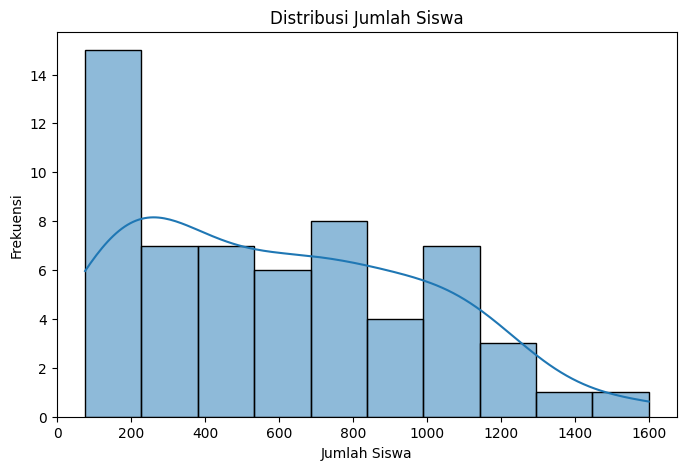

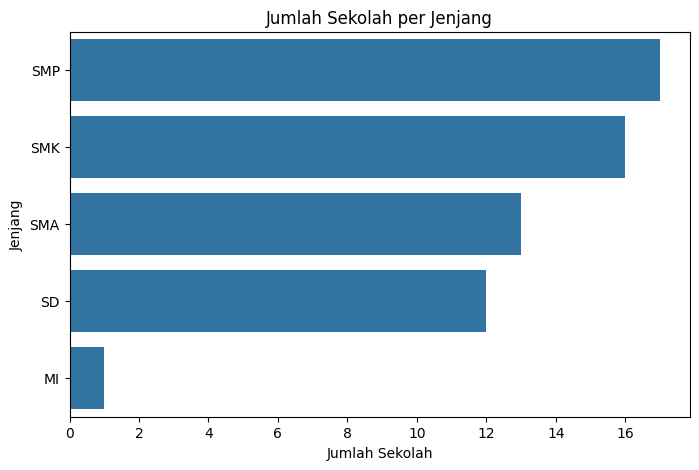

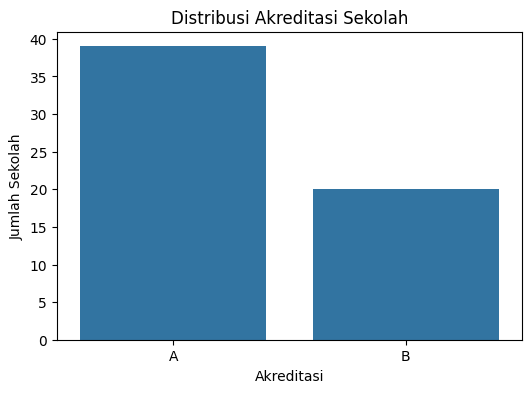

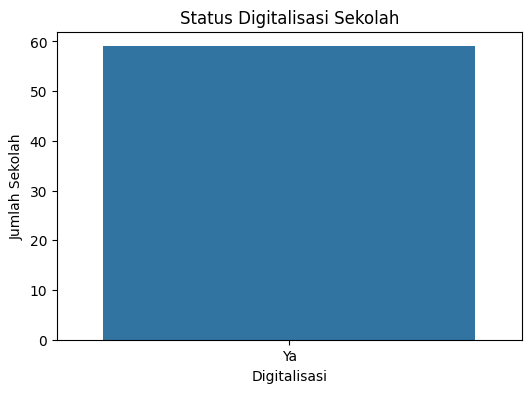

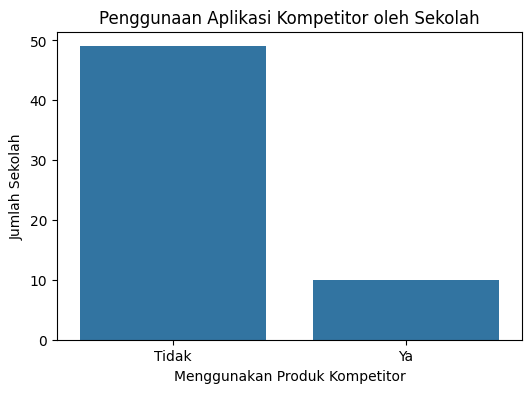

In [ ]:
# persebaran distribusi jumlah siswa
plt.figure(figsize=(8, 5))
sns.histplot(df['Jumlah Siswa'], bins=10, kde=True)
plt.title('Distribusi Jumlah Siswa')
plt.xlabel('Jumlah Siswa')
plt.ylabel('Frekuensi')
plt.show()

# persebaran jumlah sekolah per jenjang
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Jenjang', order=df['Jenjang'].value_counts().index)
plt.title('Jumlah Sekolah per Jenjang')
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Jenjang')
plt.show()

# persebaran distribusi akreditasi sekolah
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Akreditasi', order=df['Akreditasi'].value_counts().index)
plt.title('Distribusi Akreditasi Sekolah')
plt.xlabel('Akreditasi')
plt.ylabel('Jumlah Sekolah')
plt.show()

# persebaran status digitalisasi sekolah
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Digitalisasi')
plt.title('Status Digitalisasi Sekolah')
plt.xlabel('Digitalisasi')
plt.ylabel('Jumlah Sekolah')
plt.show()

# persebaran pengguna aplikasi Kompetitor oleh sekolah
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Menggunakan Produk Kompetitor')
plt.title('Penggunaan Aplikasi Kompetitor oleh Sekolah')
plt.xlabel('Menggunakan Produk Kompetitor')
plt.ylabel('Jumlah Sekolah')
plt.show()

# **6. Encoding Data Kategorikal**

Setelah saya memilih kolom-kolom yang relevan, saya melakukan proses *encoding* terhadap data kategorikal. Hal ini penting karena beberapa algoritma data mining, seperti K-Means clustering yang saya gunakan dalam penelitian ini, hanya dapat bekerja dengan data numerik. Untuk itu, saya menggunakan `LabelEncoder` dari *library* `sklearn.preprocessing` seperti pada kode berikut:

```python
le = LabelEncoder()
for col in df_selected.select_dtypes(include='object').columns:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))
```

Proses ini dimulai dengan mendeteksi semua kolom dalam `df_selected` yang bertipe data objek atau kategori, lalu setiap nilai unik dalam kolom tersebut diubah menjadi angka. Misalnya, jika ada data seperti 'Ya' dan 'Tidak', maka akan dikonversi menjadi 1 dan 0. Saya menggunakan `astype(str)` untuk memastikan bahwa seluruh nilai dalam kolom terbaca dalam bentuk *string* sebelum dikonversi.

Tujuan dari proses *encoding* ini adalah agar semua fitur dalam data saya berada dalam format yang sesuai untuk dilakukan analisis lebih lanjut, termasuk dalam proses *clustering* atau pemodelan lain yang saya lakukan di tahap berikutnya.



In [ ]:
# 6. Encoding data kategorikal
le = LabelEncoder()
for col in df_selected.select_dtypes(include='object').columns:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# Pengecekan data yang di ubah jadi nilai 1 dan 0
df_selected

,Tertarik,Akreditasi,Jumlah Siswa,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,0,0,644,0,0,0,0,0,0,0
1,0,0,500,0,0,0,0,0,0,0
5,0,0,110,0,1,0,1,0,0,0
6,0,1,75,0,0,0,1,0,0,0
8,0,1,205,0,0,0,1,0,0,0
12,0,1,500,0,0,1,0,0,0,0
15,0,1,112,0,0,0,1,0,0,0
16,0,0,900,0,0,0,0,0,0,0
20,0,0,800,0,0,0,0,0,0,0
22,0,0,980,0,0,1,0,0,0,0


In [ ]:
df_selected.head()

,Tertarik,Akreditasi,Jumlah Siswa,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya
0,0,0,644,0,0,0,0,0,0,0
1,0,0,500,0,0,0,0,0,0,0
5,0,0,110,0,1,0,1,0,0,0
6,0,1,75,0,0,0,1,0,0,0
8,0,1,205,0,0,0,1,0,0,0


# **7. K-Means *Clustering***
Dalam penelitian ini, saya menggunakan algoritma *K-Means* sebagai metode untuk melakukan proses *clustering* atau pengelompokan data. K-Means merupakan salah satu algoritma *unsupervised learning* yang bekerja dengan cara mengelompokkan data berdasarkan kemiripan karakteristik atau jarak antar data dalam ruang fitur.

Secara umum, cara kerja algoritma K-Means dimulai dengan menentukan jumlah cluster (K) yang diinginkan. Kemudian algoritma akan memilih titik pusat awal atau *centroid* secara acak. Setelah itu, setiap data akan dihitung jaraknya terhadap masing-masing centroid, dan dikelompokkan ke dalam cluster dengan jarak terdekat. Setelah proses pengelompokan awal selesai, posisi centroid akan diperbarui berdasarkan rata-rata dari anggota cluster tersebut. Proses ini akan terus berulang sampai posisi centroid tidak berubah lagi secara signifikan, atau hingga mencapai jumlah iterasi maksimum.

Alasan saya memilih algoritma ini adalah karena K-Means sangat efektif digunakan ketika kita ingin mengelompokkan data dalam jumlah besar dan tidak memiliki label kelas yang jelas. Dengan K-Means, saya bisa mengidentifikasi pola tersembunyi dan segmentasi berdasarkan variabel-variabel penting seperti minat sekolah, jumlah siswa, kendala internal, dan faktor digitalisasi.

Hasil dari K-Means ini nantinya akan membantu saya dalam menarik kesimpulan terkait karakteristik sekolah-sekolah yang menjadi target, serta memberikan masukan strategi yang lebih tepat berdasarkan hasil pengelompokan tersebut.

Setelah data saya standarkan, saya mulai menerapkan algoritma *K-Means* untuk melakukan pengelompokan. Pada tahap ini, saya menetapkan jumlah *cluster* sebanyak 2, dengan asumsi bahwa data sekolah dapat diklasifikasikan menjadi dua kelompok besar berdasarkan karakteristik yang telah saya pilih sebelumnya. Berikut adalah potongan kode yang saya gunakan:

```python
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)
```

Di sini saya menggunakan objek `KMeans` dari library `sklearn.cluster`, dengan parameter `n_clusters=2` yang menunjukkan jumlah *cluster* yang ingin saya bentuk. Saya juga menambahkan `random_state=42` untuk memastikan hasilnya bisa direproduksi dan konsisten setiap kali dijalankan. Parameter `n_init='auto'` digunakan untuk membiarkan sistem menentukan jumlah inisialisasi *centroid* yang optimal secara otomatis.

Setelah itu, saya menggunakan fungsi `fit_predict()` untuk menjalankan proses pelatihan sekaligus menetapkan label cluster ke masing-masing data. Hasil dari proses ini saya simpan ke dalam kolom baru di DataFrame utama, yaitu kolom `Cluster`, yang berisi angka 0 atau 1 sesuai dengan kelompok hasil *clustering*.

Dengan hasil ini, saya dapat mulai melakukan analisis lebih lanjut terhadap masing-masing *cluster*, misalnya melihat karakteristik umum dari setiap kelompok dan bagaimana perbedaannya dapat dimanfaatkan untuk menyusun strategi pemasaran yang lebih tepat sasaran.

In [ ]:
# 7. Jalankan K-Means (dengan asumsi 2 cluster)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df = df.copy()
df['Cluster'] = kmeans.fit_predict(df_selected)

In [ ]:
# Menampilkan nilai centroid 0 dan centroid 1
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_selected.columns)
print("Nilai Centroid untuk setiap kolom pada masing-masing cluster:")
print(centroids)

Nilai Centroid untuk setiap kolom pada masing-masing cluster:
   Tertarik  Akreditasi  Jumlah Siswa  Digitalisasi  \
0       0.0    0.142857    948.071429           0.0   
1       0.0    0.516129    285.129032           0.0   

   Menggunakan Produk Kompetitor  Punya Aplikasi Sendiri  Kendala Harga  \
0                       0.214286                0.250000       0.071429   
1                       0.129032                0.096774       0.225806   

   Kendala SDM  Sarana Pendukung  Kendala Budaya  
0          0.0          0.035714        0.071429  
1          0.0          0.064516        0.096774  


In [ ]:
# # Simpan hasil K-Means
# df.to_csv('hasil_clustering.csv', index=False)
# df

# Hapus kolom 'Memakai Aplikasi Lain' jika ada
if 'Memakai Aplikasi Lain' in df.columns:
    df = df.drop(columns=['Memakai Aplikasi Lain'])

# Simpan hasil clustering ke CSV tanpa kolom tersebut
df.to_csv('hasil_clustering.csv', index=False)

# Tampilkan DataFrame hasil
df


,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya,Cluster
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
1,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1
5,6,Kabupaten Cirebon,14/02/2023,SMA,SMAS PGRI Babakan,Tertarik,A,110,Hold/Tertarik,Irfan,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak,1
6,7,Kabupaten Cirebon,15/02/2023,SMK,SMK Ulumudin Susukan,Tertarik,B,75,Hold/Tertarik,Irfan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
8,9,Kabupaten Cirebon,21/02/2023,SMP,SMP ISLAM TERPADU SALMAN,Tertarik,B,205,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
12,13,Kabupaten Cirebon,22/02/2023,SMK,SMK Nasyrul Ulum Gegesik,Tertarik,B,500,Hold/Tertarik,Irfan & Kurniawan,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,1
15,16,Kabupaten Cirebon,21/02/2023,SMP,SMP TARBIYATUL BANIN,Tertarik,B,112,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
16,17,Kabupaten Cirebon,22/02/2023,SMA,SMA 1 WALED,Tertarik,A,900,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
20,21,Kabupaten Cirebon,24/02/2023,SMA,SMA NEGERI 1 CILEDUG,Tertarik,A,800,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
22,23,Kabupaten Cirebon,25/02/2023,SMA,SMA 1 GEGESIK,Tertarik,A,980,Connected,Irfan & Kurniawan,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,0


# **8. Visualisasi *Clustered* Data**

Menampilkan hasil pengelompokan data ke dalam bentuk grafik atau plot, digunakan untuk menampilkan bagaimana sekolah-sekolah yang menjadi calon pelanggan Edulink.id dikelompokkan berdasarkan karakteristik tertentu.

Dengan membuat visualisasi seperti *scatter plot*, saya bisa melihat sebaran data dari masing-masing sekolah berdasarkan dua variabel — misalnya `Jenjang` dan `Jumlah Siswa` — yang kemudian diberi warna berbeda sesuai dengan hasil cluster dari algoritma K-Means. Warna-warna tersebut mewakili masing-masing kelompok atau segmen, sehingga kita dapat melihat secara visual mana sekolah yang memiliki kemiripan karakteristik dan bagaimana perbedaannya antar cluster.

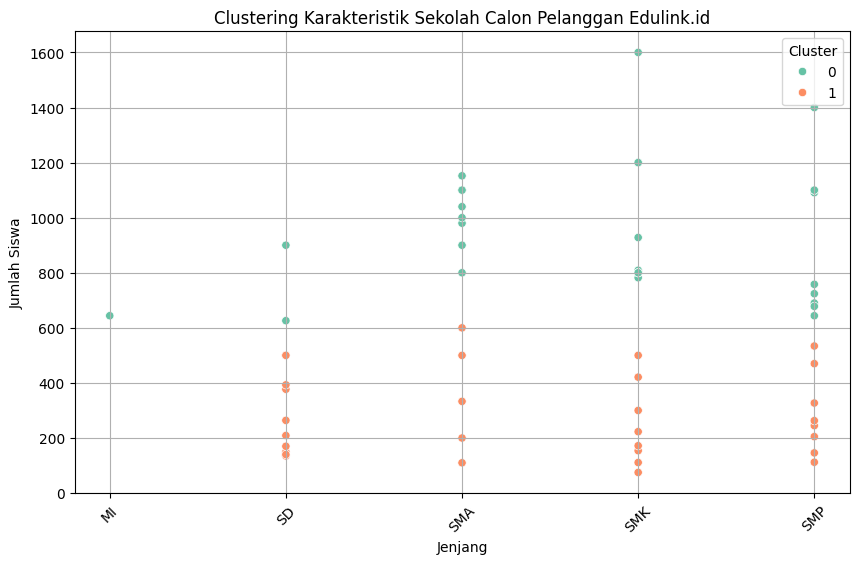

In [ ]:
# 8. Visualisasi hasil clustering (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Jenjang', y='Jumlah Siswa', hue='Cluster', palette='Set2')
plt.title('Clustering Karakteristik Sekolah Calon Pelanggan Edulink.id')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **9. Tabel Data Hasil *Clustering***

Setelah saya melakukan proses clustering menggunakan algoritma *K-Means* dan memvisualisasikannya dalam bentuk scatter plot, saya juga menampilkan hasil *clustering* tersebut dalam bentuk tabel agar lebih mudah dianalisis secara tekstual. Berikut adalah potongan kode yang saya gunakan:

```python
cluster_table = df[['Nama Sekolah', 'Jenjang', 'Tertarik', 'Jumlah Siswa', 'Cluster']]
print("Tabel Hasil Clustering:")
print(cluster_table)
```

Pada tahap ini, saya memanfaatkan fungsi bawaan dari *library* `pandas`, yang sebelumnya telah saya impor di awal program. Saya memilih beberapa kolom yang relevan, seperti `Nama Sekolah`, `Jenjang`, `Tertarik`, `Jumlah Siswa`, dan `Cluster` untuk dimasukkan ke dalam variabel baru bernama `cluster_table`. Kemudian, saya mencetak tabel tersebut ke layar menggunakan fungsi `print()` agar dapat dilihat hasil akhir dari pengelompokan data.

Dengan menampilkan hasil ini dalam bentuk tabel, saya dapat lebih mudah mengamati setiap sekolah masuk ke dalam cluster mana, serta melakukan evaluasi terhadap karakteristik masing-masing kelompok. Tabel ini juga sangat membantu untuk proses analisis lanjutan, seperti mengidentifikasi kebutuhan spesifik dari tiap cluster atau merancang strategi pemasaran yang sesuai.

In [ ]:
# 9. Hasil dalam bentuk tabel
cluster_table = df[['Nama Sekolah', 'Jenjang', 'Tertarik', 'Jumlah Siswa', 'Cluster']]
print("Tabel Hasil Clustering:")
print(cluster_table)
cluster_table

Tabel Hasil Clustering:
                               Nama Sekolah Jenjang  Tertarik  Jumlah Siswa  \
0                           MI Al-Washliyah      MI  Tertarik           644   
1                         SDIT Sabilul Huda      SD  Tertarik           500   
5                         SMAS PGRI Babakan     SMA  Tertarik           110   
6                      SMK Ulumudin Susukan     SMK  Tertarik            75   
8                  SMP ISLAM TERPADU SALMAN     SMP  Tertarik           205   
12                 SMK Nasyrul Ulum Gegesik     SMK  Tertarik           500   
15                     SMP TARBIYATUL BANIN     SMP  Tertarik           112   
16                              SMA 1 WALED     SMA  Tertarik           900   
20                     SMA NEGERI 1 CILEDUG     SMA  Tertarik           800   
22                            SMA 1 GEGESIK     SMA  Tertarik           980   
23                SMA NEGERI 9 KOTA CIREBON     SMA  Tertarik          1040   
25                          

,Nama Sekolah,Jenjang,Tertarik,Jumlah Siswa,Cluster
0,MI Al-Washliyah,MI,Tertarik,644,0
1,SDIT Sabilul Huda,SD,Tertarik,500,1
5,SMAS PGRI Babakan,SMA,Tertarik,110,1
6,SMK Ulumudin Susukan,SMK,Tertarik,75,1
8,SMP ISLAM TERPADU SALMAN,SMP,Tertarik,205,1
12,SMK Nasyrul Ulum Gegesik,SMK,Tertarik,500,1
15,SMP TARBIYATUL BANIN,SMP,Tertarik,112,1
16,SMA 1 WALED,SMA,Tertarik,900,0
20,SMA NEGERI 1 CILEDUG,SMA,Tertarik,800,0
22,SMA 1 GEGESIK,SMA,Tertarik,980,0


In [ ]:
# 9. Hasil dalam bentuk tabel
cluster_table = df[['Wilayah', 'Tanggal Kunjungan','Jenjang', 'Nama Sekolah', 'Tertarik', 'Akreditasi', 'Jumlah Siswa', 'Digitalisasi', 'Menggunakan Produk Kompetitor','Punya Aplikasi Sendiri','Kendala Harga','Kendala SDM','Sarana Pendukung','Kendala Budaya' , 'Cluster']]
print("Tabel Hasil Clustering:")
print(cluster_table)
cluster_table

Tabel Hasil Clustering:
              Wilayah Tanggal Kunjungan Jenjang  \
0   Kabupaten Cirebon        25/01/2023      MI   
1   Kabupaten Cirebon        26/01/2023      SD   
5   Kabupaten Cirebon        14/02/2023     SMA   
6   Kabupaten Cirebon        15/02/2023     SMK   
8   Kabupaten Cirebon        21/02/2023     SMP   
12  Kabupaten Cirebon        22/02/2023     SMK   
15  Kabupaten Cirebon        21/02/2023     SMP   
16  Kabupaten Cirebon        22/02/2023     SMA   
20  Kabupaten Cirebon        24/02/2023     SMA   
22  Kabupaten Cirebon        25/02/2023     SMA   
23  Kabupaten Cirebon        26/02/2023     SMA   
25  Kabupaten Cirebon        01/11/2022      SD   
26  Kabupaten Cirebon        07/11/2022      SD   
27  Kabupaten Cirebon        25/10/2022      SD   
28  Kabupaten Cirebon        16/12/2022      SD   
31  Kabupaten Cirebon         20/2/2023     SMP   
32  Kabupaten Cirebon         20/2/2023     SMP   
33  Kabupaten Cirebon        15/11/2022     SMP   
37  Kab

,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya,Cluster
0,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
1,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1
5,Kabupaten Cirebon,14/02/2023,SMA,SMAS PGRI Babakan,Tertarik,A,110,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak,1
6,Kabupaten Cirebon,15/02/2023,SMK,SMK Ulumudin Susukan,Tertarik,B,75,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
8,Kabupaten Cirebon,21/02/2023,SMP,SMP ISLAM TERPADU SALMAN,Tertarik,B,205,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
12,Kabupaten Cirebon,22/02/2023,SMK,SMK Nasyrul Ulum Gegesik,Tertarik,B,500,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,1
15,Kabupaten Cirebon,21/02/2023,SMP,SMP TARBIYATUL BANIN,Tertarik,B,112,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
16,Kabupaten Cirebon,22/02/2023,SMA,SMA 1 WALED,Tertarik,A,900,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
20,Kabupaten Cirebon,24/02/2023,SMA,SMA NEGERI 1 CILEDUG,Tertarik,A,800,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
22,Kabupaten Cirebon,25/02/2023,SMA,SMA 1 GEGESIK,Tertarik,A,980,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,0


# **10. Pemisahan Data *Cluster 0* dan *Cluster 1***
Setelah saya berhasil mengelompokkan data sekolah ke dalam dua cluster dan menampilkannya dalam bentuk tabel, saya kemudian menyimpan hasil pengelompokan tersebut ke dalam file CSV terpisah untuk setiap cluster. Tujuannya adalah agar hasil clustering dapat dianalisis lebih lanjut di luar notebook ini, atau dibagikan kepada pihak lain seperti tim pemasaran atau pengambil keputusan. Berikut adalah kode yang saya gunakan:

```python
for cluster_num in range(2):
    cluster_data = df[df['Cluster'] == cluster_num]
    file_name = f"cluster_{cluster_num}.csv"
    cluster_data.to_csv(file_name, index=False)
    print(f"Data cluster {cluster_num} disimpan ke {file_name}")
```

Proses ini saya lakukan dengan bantuan fungsi `to_csv()` dari library `pandas`, yang saya gunakan untuk mengekspor DataFrame ke format file CSV. Saya menggunakan perulangan `for` untuk menyimpan masing-masing cluster (yaitu cluster 0 dan cluster 1) ke dalam file yang berbeda. Nama file akan mengikuti format `cluster_0.csv` dan `cluster_1.csv` secara otomatis sesuai nomor cluster-nya. Saya juga menambahkan `index=False` agar kolom index dari DataFrame tidak ikut tersimpan ke file.

Langkah ini penting dalam penelitian saya karena memungkinkan saya untuk melakukan analisis lanjutan per cluster, atau menggunakannya sebagai dasar dalam penyusunan strategi pendekatan yang berbeda sesuai karakteristik masing-masing kelompok sekolah calon pelanggan Edulink.id.

In [ ]:
# 10. Simpan hasil tiap cluster ke file CSV
for cluster_num in range(2):  # Iterasi untuk cluster 0 dan 1
    cluster_data = df[df['Cluster'] == cluster_num]
    file_name = f"cluster_{cluster_num}.csv"  # Nama file berdasarkan nomor cluster
    cluster_data.to_csv(file_name, index=False)
    print(f"Data cluster {cluster_num} disimpan ke {file_name}")

Data cluster 0 disimpan ke cluster_0.csv
Data cluster 1 disimpan ke cluster_1.csv


# **11. Analisis Data *Cluter 0***

Pada tahap ini, saya melakukan analisis lanjutan terhadap data yang termasuk dalam *cluster* 0. Untuk itu, saya terlebih dahulu memuat ulang file `cluster_0.csv` yang sebelumnya telah saya simpan. Berikut langkah-langkah analisisnya:

```python
cluster_0 = pd.read_csv('/content/cluster_0.csv')
```

Saya menggunakan `pandas` untuk membaca data CSV ke dalam bentuk DataFrame agar bisa diolah dan divisualisasikan lebih lanjut. Setelah itu, saya menggunakan `matplotlib.pyplot` dan `seaborn` sebagai dua library utama untuk visualisasi data. Keduanya sudah saya import di awal, dan sangat berguna untuk membuat grafik statistik yang informatif dan mudah dibaca.

**Penjelasan Visualisasi Data – Analisis Cluster 0**  
> Pada tahapan ini, saya telah melakukan analisis visualisasi data terhadap sekolah-sekolah yang termasuk ke dalam **Cluster 0** hasil dari proses *clustering* menggunakan algoritma *K-Means*. Tujuan saya melakukan visualisasi ini adalah agar saya bisa mendapatkan gambaran yang lebih jelas terkait karakteristik masing-masing sekolah dalam *cluster* tersebut. Dari visualisasi ini juga, saya bisa melihat pola, tren, dan hubungan antar variabel yang nantinya bisa saya gunakan untuk membuat kesimpulan yang lebih tepat terhadap kebutuhan atau kondisi sekolah.

Berikut adalah penjelasan dari masing-masing visualisasi yang saya tampilkan:

1. **Histogram Jumlah Siswa**  
   Visualisasi ini saya gunakan untuk melihat bagaimana distribusi jumlah siswa pada sekolah-sekolah di *Cluster* 0. Dengan histogram ini saya bisa mengidentifikasi apakah data jumlah siswa menyebar secara normal atau tidak, serta apakah ada sekolah dengan jumlah siswa yang secara ekstrem jauh lebih tinggi atau rendah dari yang lain.

2. **Count Plot Jenjang Sekolah**  
   Saya ingin mengetahui jenjang pendidikan apa saja yang mendominasi pada cluster ini. Dari hasil count plot, saya bisa melihat bahwa mayoritas sekolah dalam *cluster* ini berasal dari jenjang tertentu, misalnya SD atau SMP, sehingga ini dapat menjadi acuan segmentasi pendekatan untuk produk yang saya teliti.

3. **Count Plot Akreditasi Sekolah**  
   Dalam visualisasi ini saya mengecek bagaimana distribusi status akreditasi sekolah pada *cluster* 0. Akreditasi menurut saya penting karena bisa merepresentasikan kualitas sekolah dan kesiapan mereka terhadap teknologi pendidikan, terutama produk digital yang ingin ditawarkan.

4. **Box Plot Jumlah Siswa per Cluster**  
   Box plot ini saya tampilkan untuk melihat persebaran dan outlier dari jumlah siswa di masing-masing cluster. Dari sini saya juga bisa bandingkan apakah *Cluster* 0 memiliki kecenderungan sekolah-sekolah dengan jumlah siswa yang besar atau kecil.

5. **Count Plot Penggunaan Aplikasi Lain dan Produk Kompetitor**  
   Saya juga memvisualisasikan apakah sekolah-sekolah di *cluster* ini **sudah menggunakan aplikasi lain atau produk kompetitor**. Ini penting untuk menganalisis tingkat adopsi teknologi dan juga tantangan kompetitif yang mungkin dihadapi oleh Edulink.id sebagai solusi baru.

6. **Count Plot Digitalisasi Sekolah**  
   Visualisasi ini menunjukkan seberapa banyak sekolah yang sudah menerapkan digitalisasi dalam aktivitas mereka. Informasi ini menurut saya penting untuk melihat kesiapan mereka dalam menerima produk digital seperti Edulink.id.

7. **Bar Plot Kendala Sekolah**  
   Saya juga menganalisis kendala yang dihadapi sekolah berdasarkan beberapa faktor seperti harga, SDM, sarana pendukung, dan budaya. Saya memvisualisasikan ini agar bisa melihat kendala mana yang paling sering terjadi, dan dari sini saya bisa menyarankan solusi yang lebih tepat untuk masing-masing permasalahan tersebut.

> Secara keseluruhan, visualisasi ini saya buat untuk memperkuat hasil analisis *clustering*, sekaligus sebagai dasar pemahaman terhadap profil dan tantangan dari sekolah-sekolah yang termasuk dalam *cluster* ini. Harapan saya, hasil visualisasi ini bisa menjadi landasan strategi yang lebih tepat dalam menawarkan produk ke sekolah sesuai karakteristik masing-masing *cluster*.

In [ ]:
# 1. Load data cluster 0
cluster_0 = pd.read_csv('/content/cluster_0.csv')
cluster_0

,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya,Cluster
0,1,Kabupaten Cirebon,25/01/2023,MI,MI Al-Washliyah,Tertarik,A,644,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
1,17,Kabupaten Cirebon,22/02/2023,SMA,SMA 1 WALED,Tertarik,A,900,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
2,21,Kabupaten Cirebon,24/02/2023,SMA,SMA NEGERI 1 CILEDUG,Tertarik,A,800,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
3,23,Kabupaten Cirebon,25/02/2023,SMA,SMA 1 GEGESIK,Tertarik,A,980,Connected,Irfan & Kurniawan,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,0
4,24,Kabupaten Cirebon,26/02/2023,SMA,SMA NEGERI 9 KOTA CIREBON,Tertarik,A,1040,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
5,26,Kabupaten Cirebon,01/11/2022,SD,SDIT Assunnah,Tertarik,A,626,Connected,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Tidak Ada,Ya,0
6,33,Kabupaten Cirebon,20/2/2023,SMP,SMP TUNAS PERTIWI,Tertarik,B,690,Connected,Ulfa dan Kurniawan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Ya,0
7,43,Kabupaten Cirebon,17/11/2022,SMK,SMKS PESANTREN CIWARINGIN,Tertarik,A,928,Won Deal,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0
8,46,Kabupaten Cirebon,07/12/2022,SMK,SMK Yami Waled,Tertarik,B,782,Connected,Ulfa,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,0
9,52,Kabupaten Cirebon,25/01/2023,SMK,SMKS Ponpes Manbauul Ulum,Tertarik,A,809,Connected,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,0


In [ ]:
# bentuk data frame cluster 0
cluster_0.shape

(28, 18)

   No            Wilayah Tanggal Kunjungan Jenjang               Nama Sekolah  \
0   1  Kabupaten Cirebon        25/01/2023      MI            MI Al-Washliyah   
1  17  Kabupaten Cirebon        22/02/2023     SMA                SMA 1 WALED   
2  21  Kabupaten Cirebon        24/02/2023     SMA       SMA NEGERI 1 CILEDUG   
3  23  Kabupaten Cirebon        25/02/2023     SMA              SMA 1 GEGESIK   
4  24  Kabupaten Cirebon        26/02/2023     SMA  SMA NEGERI 9 KOTA CIREBON   

   Tertarik Akreditasi  Jumlah Siswa     Status      Tim Kunjungan  \
0  Tertarik          A           644  Connected  Irfan & Kurniawan   
1  Tertarik          A           900  Connected  Irfan & Kurniawan   
2  Tertarik          A           800  Connected  Irfan & Kurniawan   
3  Tertarik          A           980  Connected  Irfan & Kurniawan   
4  Tertarik          A          1040  Connected  Irfan & Kurniawan   

  Digitalisasi Menggunakan Produk Kompetitor Punya Aplikasi Sendiri  \
0           Ya       

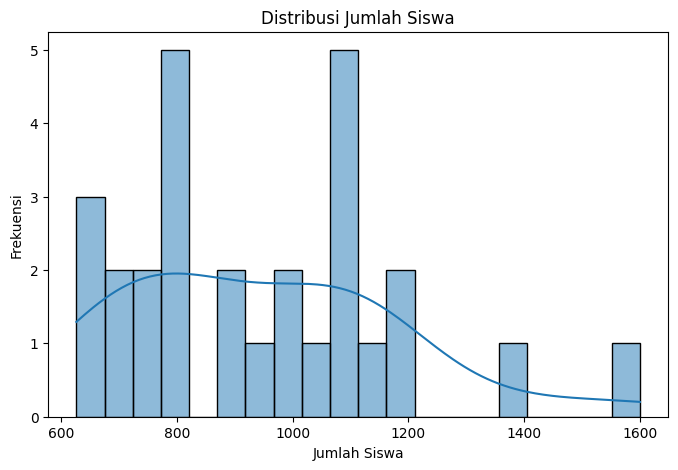

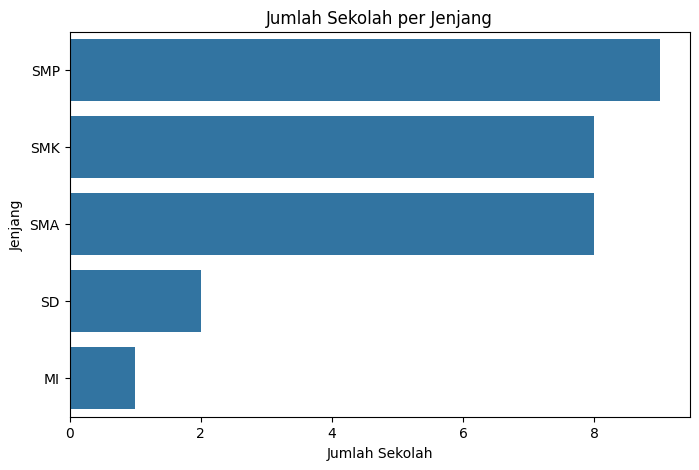

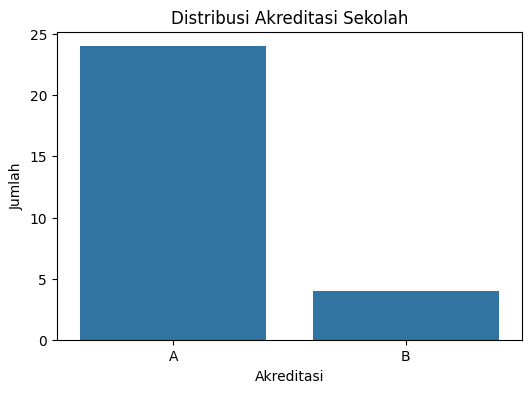

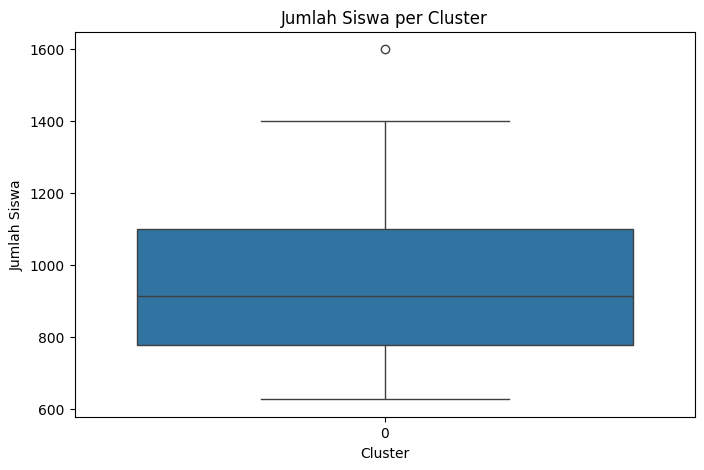

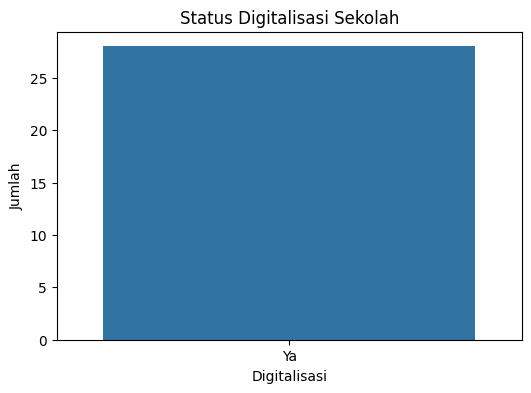

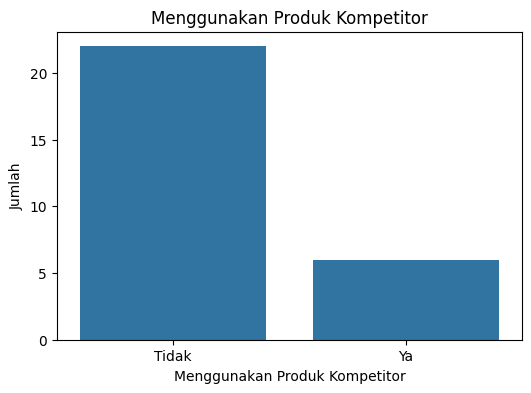

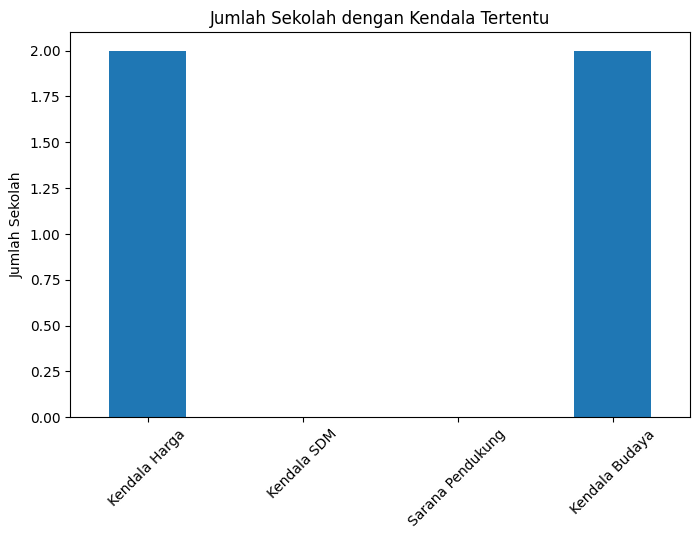

In [ ]:
# Analisis cluster_0
# Load data
df = pd.read_csv('/content/cluster_0.csv')

# Lihat 5 data teratas
print(df.head())

# Info data
print("\nInformasi Data:")
print(df.info())

# Cek missing value
print("\nMissing Values:")
print(df.isnull().sum())

# Perbaiki kolom tanggal
df['Tanggal Kunjungan'] = pd.to_datetime(df['Tanggal Kunjungan'], dayfirst=True, errors='coerce')

# Statistik deskriptif numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistik deskriptif kategorikal
print("\nStatistik Data Kategorikal:")
print(df.describe(include=['object']))

# Distribusi 'Jumlah Siswa'
plt.figure(figsize=(8,5))
sns.histplot(df['Jumlah Siswa'], bins=20, kde=True)
plt.title('Distribusi Jumlah Siswa')
plt.xlabel('Jumlah Siswa')
plt.ylabel('Frekuensi')
plt.show()

# Komposisi Jenjang
plt.figure(figsize=(8,5))
sns.countplot(y='Jenjang', data=df, order=df['Jenjang'].value_counts().index)
plt.title('Jumlah Sekolah per Jenjang')
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Jenjang')
plt.show()

# Komposisi Akreditasi
plt.figure(figsize=(6,4))
sns.countplot(x='Akreditasi', data=df, order=df['Akreditasi'].value_counts().index)
plt.title('Distribusi Akreditasi Sekolah')
plt.xlabel('Akreditasi')
plt.ylabel('Jumlah')
plt.show()

# Korelasi Jumlah Siswa berdasarkan Cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Jumlah Siswa', data=df)
plt.title('Jumlah Siswa per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Siswa')
plt.show()

# Digitalisasi sekolah
plt.figure(figsize=(6,4))
sns.countplot(x='Digitalisasi', data=df)
plt.title('Status Digitalisasi Sekolah')
plt.xlabel('Digitalisasi')
plt.ylabel('Jumlah')
plt.show()

# Menggunakan Produk Kompetitor
plt.figure(figsize=(6,4))
sns.countplot(x='Menggunakan Produk Kompetitor', data=df)
plt.title('Menggunakan Produk Kompetitor')
plt.xlabel('Menggunakan Produk Kompetitor')
plt.ylabel('Jumlah')
plt.show()

# Perbandingan kendala
kendala_cols = ['Kendala Harga', 'Kendala SDM', 'Sarana Pendukung', 'Kendala Budaya']
kendala_data = df[kendala_cols].apply(lambda x: (x == 'Ya').sum())

kendala_data.plot(kind='bar', figsize=(8,5))
plt.title('Jumlah Sekolah dengan Kendala Tertentu')
plt.ylabel('Jumlah Sekolah')
plt.xticks(rotation=45)
plt.show()


# **12. Analisis Data *Cluter 1***

Pada tahap ini, saya melakukan analisis lanjutan terhadap data yang termasuk dalam cluster 1. Untuk itu, saya terlebih dahulu memuat ulang file `cluster_1.csv` yang sebelumnya telah saya simpan. Berikut langkah-langkah analisisnya:

```python
cluster_1 = pd.read_csv('/content/cluster_1.csv')
```

Saya menggunakan `pandas` untuk membaca data CSV ke dalam bentuk DataFrame agar bisa diolah dan divisualisasikan lebih lanjut. Setelah itu, saya menggunakan `matplotlib.pyplot` dan `seaborn` sebagai dua library utama untuk visualisasi data. Keduanya sudah saya import di awal, dan sangat berguna untuk membuat grafik statistik yang informatif dan mudah dibaca.

**Penjelasan Visualisasi Data – Analisis Cluster 1**  
> Pada tahapan ini, saya telah melakukan analisis visualisasi data terhadap sekolah-sekolah yang termasuk ke dalam **Cluster 1** hasil dari proses *clustering* menggunakan algoritma *K-Means*. Tujuan saya melakukan visualisasi ini adalah agar saya bisa mendapatkan gambaran yang lebih jelas terkait karakteristik masing-masing sekolah dalam *cluster* tersebut. Dari visualisasi ini juga, saya bisa melihat pola, tren, dan hubungan antar variabel yang nantinya bisa saya gunakan untuk membuat kesimpulan yang lebih tepat terhadap kebutuhan atau kondisi sekolah.

Berikut adalah penjelasan dari masing-masing visualisasi yang saya tampilkan:

1. **Histogram Jumlah Siswa**  
   Visualisasi ini saya gunakan untuk melihat bagaimana distribusi jumlah siswa pada sekolah-sekolah di Cluster 1. Dengan histogram ini saya bisa mengidentifikasi apakah data jumlah siswa menyebar secara normal atau tidak, serta apakah ada sekolah dengan jumlah siswa yang secara ekstrem jauh lebih tinggi atau rendah dari yang lain.

2. **Count Plot Jenjang Sekolah**  
   Saya ingin mengetahui jenjang pendidikan apa saja yang mendominasi pada *cluster* ini. Dari hasil count plot, saya bisa melihat bahwa mayoritas sekolah dalam *cluster* ini berasal dari jenjang tertentu, misalnya SD atau SMP, sehingga ini dapat menjadi acuan segmentasi pendekatan untuk produk yang saya teliti.

3. **Count Plot Akreditasi Sekolah**  
   Dalam visualisasi ini saya mengecek bagaimana distribusi status akreditasi sekolah pada *cluster* 1. Akreditasi menurut saya penting karena bisa merepresentasikan kualitas sekolah dan kesiapan mereka terhadap teknologi pendidikan, terutama produk digital yang ingin ditawarkan.

4. **Box Plot Jumlah Siswa per *Cluster***  
   Box plot ini saya tampilkan untuk melihat persebaran dan outlier dari jumlah siswa di masing-masing cluster. Dari sini saya juga bisa bandingkan apakah Cluster 1 memiliki kecenderungan sekolah-sekolah dengan jumlah siswa yang besar atau kecil.

5. **Count Plot Penggunaan Aplikasi Lain dan Produk Kompetitor**  
   Saya juga memvisualisasikan apakah sekolah-sekolah di *cluster* ini **sudah menggunakan aplikasi lain atau produk kompetitor**. Ini penting untuk menganalisis tingkat adopsi teknologi dan juga tantangan kompetitif yang mungkin dihadapi oleh Edulink.id sebagai solusi baru.

6. **Count Plot Digitalisasi Sekolah**  
   Visualisasi ini menunjukkan seberapa banyak sekolah yang sudah menerapkan digitalisasi dalam aktivitas mereka. Informasi ini menurut saya penting untuk melihat kesiapan mereka dalam menerima produk digital seperti Edulink.id.

7. **Bar Plot Kendala Sekolah**  
   Saya juga menganalisis kendala yang dihadapi sekolah berdasarkan beberapa faktor seperti harga, SDM, sarana pendukung, dan budaya. Saya memvisualisasikan ini agar bisa melihat kendala mana yang paling sering terjadi, dan dari sini saya bisa menyarankan solusi yang lebih tepat untuk masing-masing permasalahan tersebut.

> Secara keseluruhan, visualisasi ini saya buat untuk memperkuat hasil analisis clustering, sekaligus sebagai dasar pemahaman terhadap profil dan tantangan dari sekolah-sekolah yang termasuk dalam *cluster* ini. Harapan saya, hasil visualisasi ini bisa menjadi landasan strategi yang lebih tepat dalam menawarkan produk ke sekolah sesuai karakteristik masing-masing *cluster*.



In [ ]:
# 1. Load data cluster 1
cluster_1 = pd.read_csv('/content/cluster_1.csv')
cluster_1

,No,Wilayah,Tanggal Kunjungan,Jenjang,Nama Sekolah,Tertarik,Akreditasi,Jumlah Siswa,Status,Tim Kunjungan,Digitalisasi,Menggunakan Produk Kompetitor,Punya Aplikasi Sendiri,Kendala Harga,Kendala SDM,Sarana Pendukung,Kendala Budaya,Cluster
0,2,Kabupaten Cirebon,26/01/2023,SD,SDIT Sabilul Huda,Tertarik,A,500,Connected,Irfan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1
1,6,Kabupaten Cirebon,14/02/2023,SMA,SMAS PGRI Babakan,Tertarik,A,110,Hold/Tertarik,Irfan,Ya,Ya,Tidak,Ya,Tidak,Ada,Tidak,1
2,7,Kabupaten Cirebon,15/02/2023,SMK,SMK Ulumudin Susukan,Tertarik,B,75,Hold/Tertarik,Irfan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
3,9,Kabupaten Cirebon,21/02/2023,SMP,SMP ISLAM TERPADU SALMAN,Tertarik,B,205,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
4,13,Kabupaten Cirebon,22/02/2023,SMK,SMK Nasyrul Ulum Gegesik,Tertarik,B,500,Hold/Tertarik,Irfan & Kurniawan,Ya,Tidak,Ya,Tidak,Tidak,Ada,Tidak,1
5,16,Kabupaten Cirebon,21/02/2023,SMP,SMP TARBIYATUL BANIN,Tertarik,B,112,Connected,Irfan & Kurniawan,Ya,Tidak,Tidak,Ya,Tidak,Ada,Tidak,1
6,27,Kabupaten Cirebon,07/11/2022,SD,SDIT Al-Hikmah,Tertarik,B,377,Prospect,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1
7,28,Kabupaten Cirebon,25/10/2022,SD,SDIT Al Falah Pelandakan,Tertarik,A,393,Prospect,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Ya,1
8,29,Kabupaten Cirebon,16/12/2022,SD,SDIT Nusintama Lab School,Tertarik,B,209,Hold/Tertarik,Ulfa,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1
9,32,Kabupaten Cirebon,20/2/2023,SMP,SMP PESANTREN CIWARINGIN,Tertarik,A,327,Hold/Tertarik,Ulfa dan Kurniawan,Ya,Tidak,Tidak,Tidak,Tidak,Ada,Tidak,1


In [ ]:
# bentuk data frame cluster 1
cluster_1.shape

(31, 18)

   No            Wilayah Tanggal Kunjungan Jenjang              Nama Sekolah  \
0   2  Kabupaten Cirebon        26/01/2023      SD         SDIT Sabilul Huda   
1   6  Kabupaten Cirebon        14/02/2023     SMA         SMAS PGRI Babakan   
2   7  Kabupaten Cirebon        15/02/2023     SMK      SMK Ulumudin Susukan   
3   9  Kabupaten Cirebon        21/02/2023     SMP  SMP ISLAM TERPADU SALMAN   
4  13  Kabupaten Cirebon        22/02/2023     SMK  SMK Nasyrul Ulum Gegesik   

   Tertarik Akreditasi  Jumlah Siswa         Status      Tim Kunjungan  \
0  Tertarik          A           500      Connected              Irfan   
1  Tertarik          A           110  Hold/Tertarik              Irfan   
2  Tertarik          B            75  Hold/Tertarik              Irfan   
3  Tertarik          B           205      Connected  Irfan & Kurniawan   
4  Tertarik          B           500  Hold/Tertarik  Irfan & Kurniawan   

  Digitalisasi Menggunakan Produk Kompetitor Punya Aplikasi Sendiri  \
0  

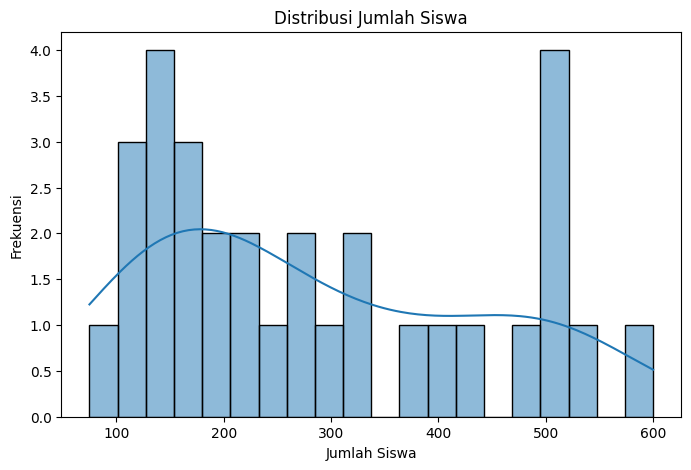

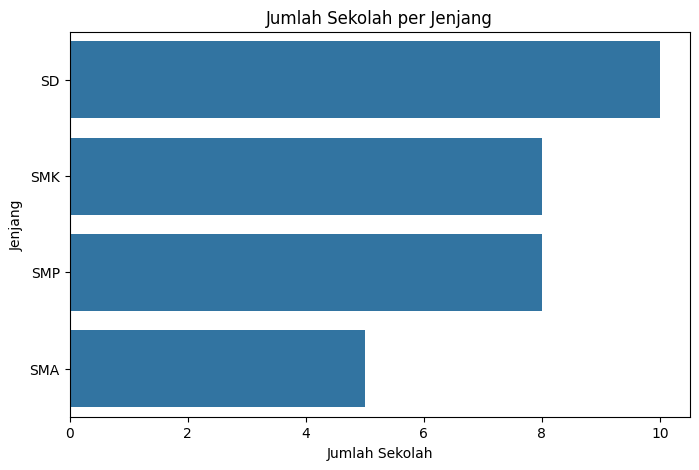

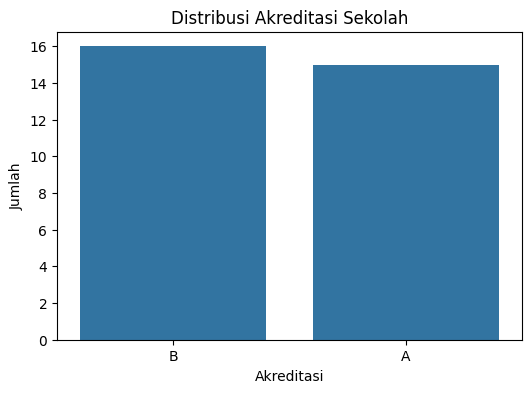

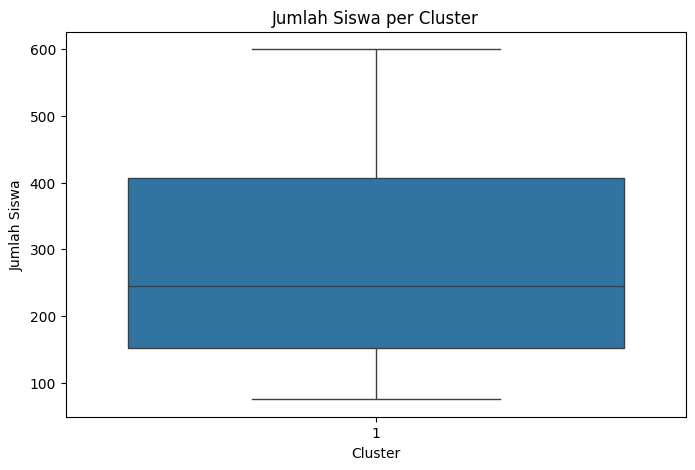

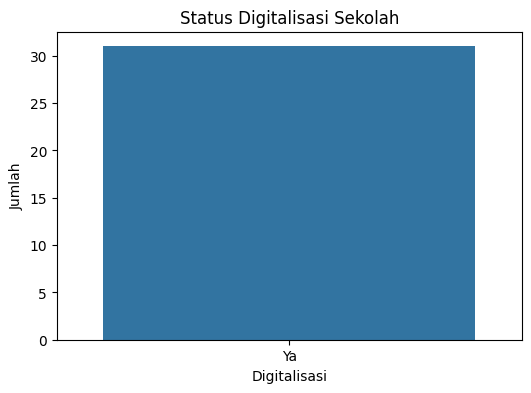

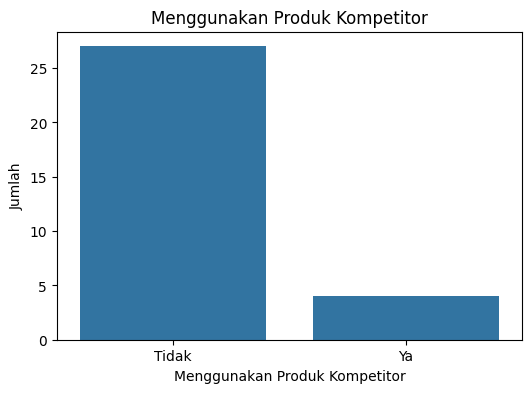

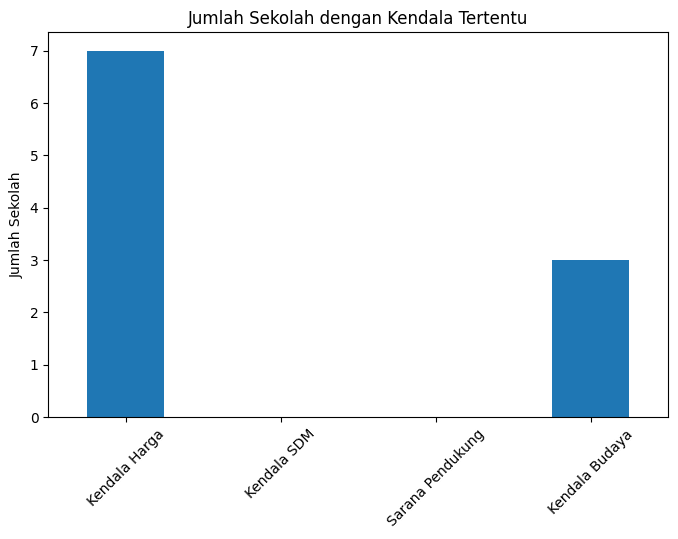

In [ ]:
# Load data
df = pd.read_csv('/content/cluster_1.csv')

# Lihat 5 data teratas
print(df.head())

# Info data
print("\nInformasi Data:")
print(df.info())

# Cek missing value
print("\nMissing Values:")
print(df.isnull().sum())

# Perbaiki kolom tanggal
df['Tanggal Kunjungan'] = pd.to_datetime(df['Tanggal Kunjungan'], dayfirst=True, errors='coerce')

# Statistik deskriptif numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistik deskriptif kategorikal
print("\nStatistik Data Kategorikal:")
print(df.describe(include=['object']))

# Distribusi 'Jumlah Siswa'
plt.figure(figsize=(8,5))
sns.histplot(df['Jumlah Siswa'], bins=20, kde=True)
plt.title('Distribusi Jumlah Siswa')
plt.xlabel('Jumlah Siswa')
plt.ylabel('Frekuensi')
plt.show()

# Komposisi Jenjang
plt.figure(figsize=(8,5))
sns.countplot(y='Jenjang', data=df, order=df['Jenjang'].value_counts().index)
plt.title('Jumlah Sekolah per Jenjang')
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Jenjang')
plt.show()

# Komposisi Akreditasi
plt.figure(figsize=(6,4))
sns.countplot(x='Akreditasi', data=df, order=df['Akreditasi'].value_counts().index)
plt.title('Distribusi Akreditasi Sekolah')
plt.xlabel('Akreditasi')
plt.ylabel('Jumlah')
plt.show()

# Korelasi Jumlah Siswa vs Cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Jumlah Siswa', data=df)
plt.title('Jumlah Siswa per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Siswa')
plt.show()

# Digitalisasi sekolah
plt.figure(figsize=(6,4))
sns.countplot(x='Digitalisasi', data=df)
plt.title('Status Digitalisasi Sekolah')
plt.xlabel('Digitalisasi')
plt.ylabel('Jumlah')
plt.show()

# Menggunakan Produk Kompetitor
plt.figure(figsize=(6,4))
sns.countplot(x='Menggunakan Produk Kompetitor', data=df)
plt.title('Menggunakan Produk Kompetitor')
plt.xlabel('Menggunakan Produk Kompetitor')
plt.ylabel('Jumlah')
plt.show()

# Perbandingan kendala
kendala_cols = ['Kendala Harga', 'Kendala SDM', 'Sarana Pendukung', 'Kendala Budaya']
kendala_data = df[kendala_cols].apply(lambda x: (x == 'Ya').sum())

kendala_data.plot(kind='bar', figsize=(8,5))
plt.title('Jumlah Sekolah dengan Kendala Tertentu')
plt.ylabel('Jumlah Sekolah')
plt.xticks(rotation=45)
plt.show()


# **13. Algoritma Apriori**

proses memfilter nilai minimal support

In [ ]:
# Load data cluster
cluster_apriori = pd.read_csv('/content/cluster_0.csv')

# Pilih kolom yang relevan
selected_columns = ['Tertarik', 'Akreditasi', 'Digitalisasi', 'Menggunakan Produk Kompetitor',
                    'Punya Aplikasi Sendiri', 'Kendala Harga', 'Kendala SDM', 'Sarana Pendukung', 'Kendala Budaya']
df_apriori = cluster_apriori[selected_columns].copy()

# One-hot encoding
df_apriori_encoded = pd.get_dummies(df_apriori)

# --- FILTER SUPPORT ---
min_support = 0.7

frequent_itemsets = apriori(df_apriori_encoded, min_support=min_support, use_colnames=True)

# Simpan hasil frequent itemsets
frequent_itemsets.to_csv('hasil_1_support_only.csv', index=False)
frequent_itemsets

,support,itemsets
0,1.000000,(Tertarik_Tertarik)
1,0.857143,(Akreditasi_A)
2,1.000000,(Digitalisasi_Ya)
3,0.785714,(Menggunakan Produk Kompetitor_Tidak)
4,0.750000,(Punya Aplikasi Sendiri_Tidak)
...,...,...
202,0.714286,"(Tertarik_Tertarik, Kendala Budaya_Tidak, Meng..."
203,0.785714,"(Digitalisasi_Ya, Kendala Budaya_Tidak, Kendal..."
204,0.714286,"(Digitalisasi_Ya, Kendala Budaya_Tidak, Menggu..."
205,0.785714,"(Tertarik_Tertarik, Digitalisasi_Ya, Kendala B..."


proses memfilter nilai minimal confidence

In [ ]:
frequent_itemsets.head()

,support,itemsets
0,1.000000,(Tertarik_Tertarik)
1,0.857143,(Akreditasi_A)
2,1.000000,(Digitalisasi_Ya)
3,0.785714,(Menggunakan Produk Kompetitor_Tidak)
4,0.750000,(Punya Aplikasi Sendiri_Tidak)


In [ ]:
# Baca ulang hasil tahap 1
frequent_itemsets = pd.read_csv('hasil_1_support_only.csv')

# Ubah kolom 'itemsets' menjadi frozenset
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(eval).apply(frozenset)
# Hitung aturan asosiasi dari frequent itemsets
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

# Simpan hasil filter confidence
rules_conf.to_csv('hasil_2_support_confidence.csv', index=False)
rules_conf

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Akreditasi_A),(Tertarik_Tertarik),0.857143,1.000000,0.857143,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.857143,0.000000,0.928571
1,(Tertarik_Tertarik),(Digitalisasi_Ya),1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,inf,0.000000,1.000000,0.000000,1.000000
2,(Digitalisasi_Ya),(Tertarik_Tertarik),1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,inf,0.000000,1.000000,0.000000,1.000000
3,(Menggunakan Produk Kompetitor_Tidak),(Tertarik_Tertarik),0.785714,1.000000,0.785714,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.785714,0.000000,0.892857
4,(Punya Aplikasi Sendiri_Tidak),(Tertarik_Tertarik),0.750000,1.000000,0.750000,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.750000,0.000000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,"(Kendala Harga_Tidak, Menggunakan Produk Kompe...","(Tertarik_Tertarik, Digitalisasi_Ya, Kendala B...",0.750000,0.928571,0.714286,0.952381,1.025641,1.0,0.017857,1.500000,0.100000,0.740741,0.333333,0.860806
1936,"(Digitalisasi_Ya, Menggunakan Produk Kompetito...","(Tertarik_Tertarik, Kendala Budaya_Tidak, Kend...",0.785714,0.892857,0.714286,0.909091,1.018182,1.0,0.012755,1.178571,0.083333,0.740741,0.151515,0.854545
1937,"(Menggunakan Produk Kompetitor_Tidak, Sarana P...","(Tertarik_Tertarik, Digitalisasi_Ya, Kendala B...",0.750000,0.892857,0.714286,0.952381,1.066667,1.0,0.044643,2.250000,0.250000,0.769231,0.555556,0.876190
1938,"(Menggunakan Produk Kompetitor_Tidak, Kendala ...","(Tertarik_Tertarik, Digitalisasi_Ya, Kendala S...",0.714286,0.892857,0.714286,1.000000,1.120000,1.0,0.076531,inf,0.375000,0.800000,1.000000,0.900000


In [ ]:
rules_conf.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Akreditasi_A),(Tertarik_Tertarik),0.857143,1.0,0.857143,1.0,1.0,1.0,0.0,inf,0.0,0.857143,0.0,0.928571
1,(Tertarik_Tertarik),(Digitalisasi_Ya),1.000000,1.0,1.000000,1.0,1.0,1.0,0.0,inf,0.0,1.000000,0.0,1.000000
2,(Digitalisasi_Ya),(Tertarik_Tertarik),1.000000,1.0,1.000000,1.0,1.0,1.0,0.0,inf,0.0,1.000000,0.0,1.000000
3,(Menggunakan Produk Kompetitor_Tidak),(Tertarik_Tertarik),0.785714,1.0,0.785714,1.0,1.0,1.0,0.0,inf,0.0,0.785714,0.0,0.892857
4,(Punya Aplikasi Sendiri_Tidak),(Tertarik_Tertarik),0.750000,1.0,0.750000,1.0,1.0,1.0,0.0,inf,0.0,0.750000,0.0,0.875000


proses memfilter nilai minimal lift

In [ ]:
# Baca ulang hasil tahap 2
rules_conf = pd.read_csv('hasil_2_support_confidence.csv')

# Filter aturan berdasarkan lift
rules_lift = rules_conf[rules_conf['lift'] >= 1.1].copy()

# Ubah ke persentase & pembulatan
rules_lift['support'] = (rules_lift['support'] * 100).round(2)
rules_lift['confidence'] = (rules_lift['confidence'] * 100).round(2)
rules_lift['lift'] = rules_lift['lift'].round(2)

# Simpan hasil akhir
rules_lift.to_csv('hasil_3_support_conf_lift.csv', index=False)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
743,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1159,"frozenset({'Tertarik_Tertarik', 'Menggunakan P...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1166,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Tertarik_Tertarik', 'Kendala Harga...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1323,"frozenset({'Digitalisasi_Ya', 'Menggunakan Pro...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1328,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Digitalisas...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1378,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1385,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Kendala SDM...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1613,"frozenset({'Tertarik_Tertarik', 'Digitalisasi_...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1622,"frozenset({'Tertarik_Tertarik', 'Menggunakan P...","frozenset({'Kendala Harga_Tidak', 'Digitalisas...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1627,"frozenset({'Digitalisasi_Ya', 'Menggunakan Pro...","frozenset({'Tertarik_Tertarik', 'Kendala Harga...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9


In [ ]:
rules_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
743,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1159,"frozenset({'Tertarik_Tertarik', 'Menggunakan P...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1166,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Tertarik_Tertarik', 'Kendala Harga...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1323,"frozenset({'Digitalisasi_Ya', 'Menggunakan Pro...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1328,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Digitalisas...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9


In [ ]:
# menampilkan data frame hasil algoritma apriori
apriori_results = pd.read_csv('hasil_3_support_conf_lift.csv')
apriori_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
1,"frozenset({'Tertarik_Tertarik', 'Menggunakan P...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
2,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Tertarik_Tertarik', 'Kendala Harga...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
3,"frozenset({'Digitalisasi_Ya', 'Menggunakan Pro...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
4,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Digitalisas...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
5,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
6,frozenset({'Menggunakan Produk Kompetitor_Tida...,"frozenset({'Kendala Harga_Tidak', 'Kendala SDM...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
7,"frozenset({'Tertarik_Tertarik', 'Digitalisasi_...","frozenset({'Kendala Harga_Tidak', 'Sarana Pend...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
8,"frozenset({'Tertarik_Tertarik', 'Menggunakan P...","frozenset({'Kendala Harga_Tidak', 'Digitalisas...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9
9,"frozenset({'Digitalisasi_Ya', 'Menggunakan Pro...","frozenset({'Tertarik_Tertarik', 'Kendala Harga...",0.714286,0.892857,71.43,100.0,1.12,1.0,0.076531,inf,0.375,0.8,1.0,0.9


/tmp/ipython-input-71-2220617009.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y=top_rules['antecedents'] + ' → ' + top_rules['consequents'], data=top_rules, palette='viridis')
/tmp/ipython-input-71-2220617009.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


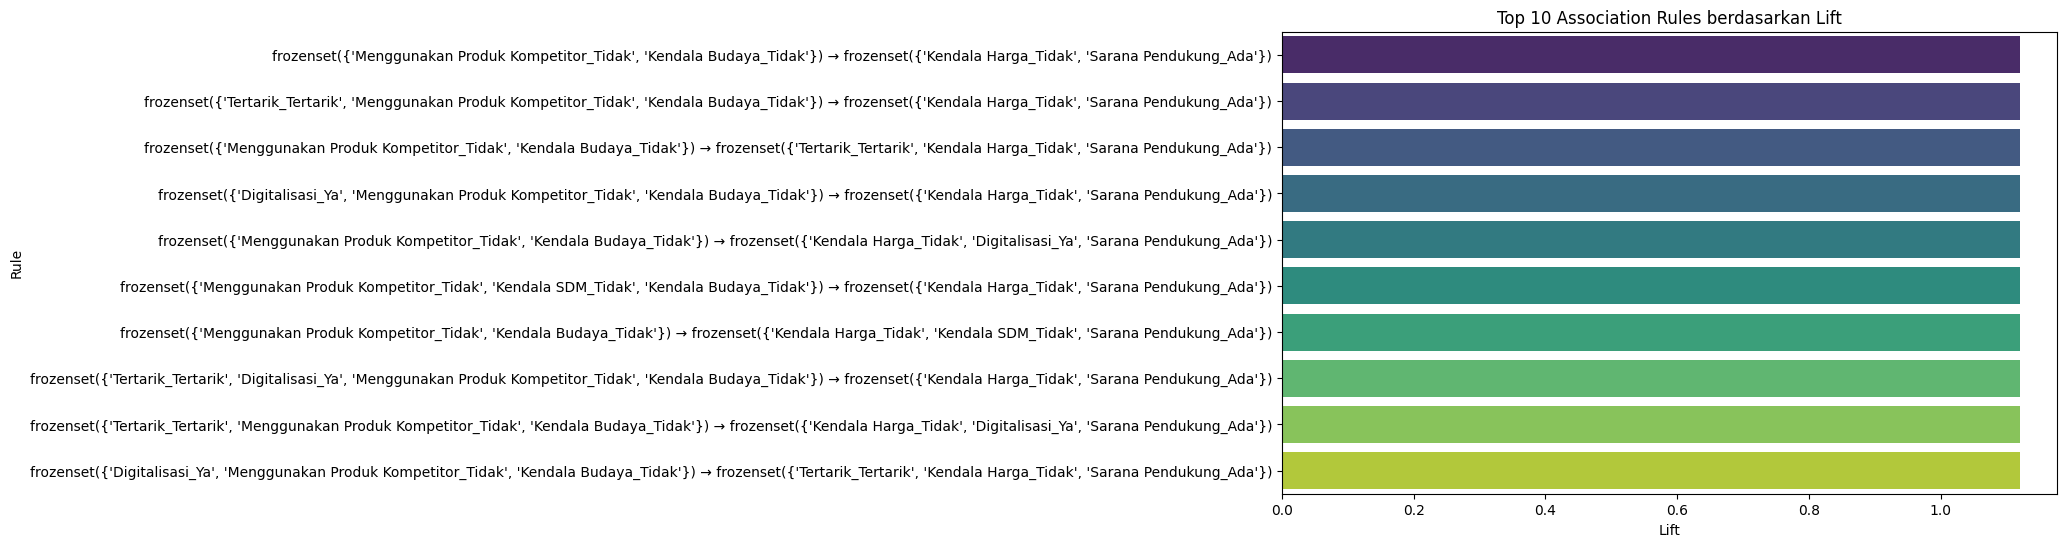

In [ ]:
#visualisasi data hasil algoritma apriori
# Load data
apriori_results = pd.read_csv('hasil_3_support_conf_lift.csv')

# Urutkan berdasarkan lift (nilai asosiasi yang kuat)
top_rules = apriori_results.sort_values(by='lift', ascending=False).head(10)

# Plot barplot lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules['antecedents'] + ' → ' + top_rules['consequents'], data=top_rules, palette='viridis')
plt.title('Top 10 Association Rules berdasarkan Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()


In [ ]:
for idx, row in top10.iterrows():
    print(f"Jika sekolah memiliki {row['antecedents']}, maka cenderung juga memiliki {row['consequents']} (Lift: {row['lift']:.2f})")

NameError: name 'top10' is not defined

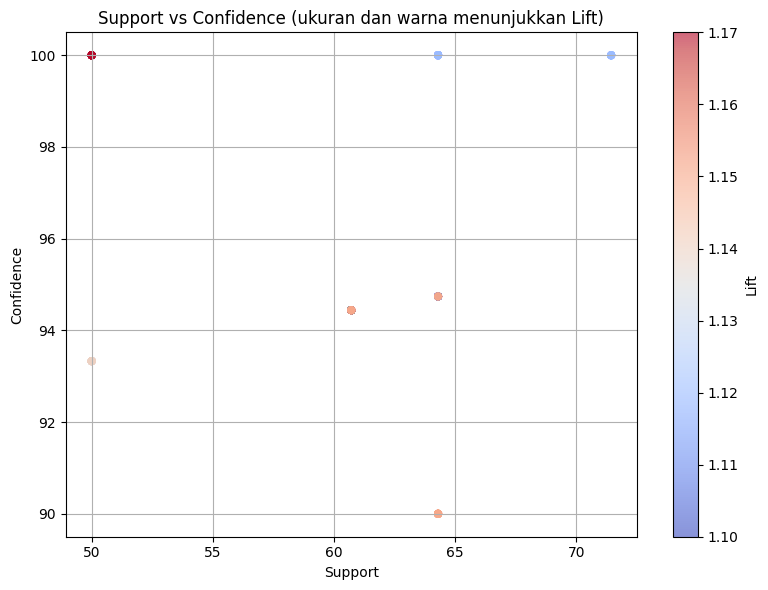

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(apriori_results['support'], apriori_results['confidence'],
            s=apriori_results['lift'] * 20, c=apriori_results['lift'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Lift')
plt.title('Support vs Confidence (ukuran dan warna menunjukkan Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-38-739644163.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


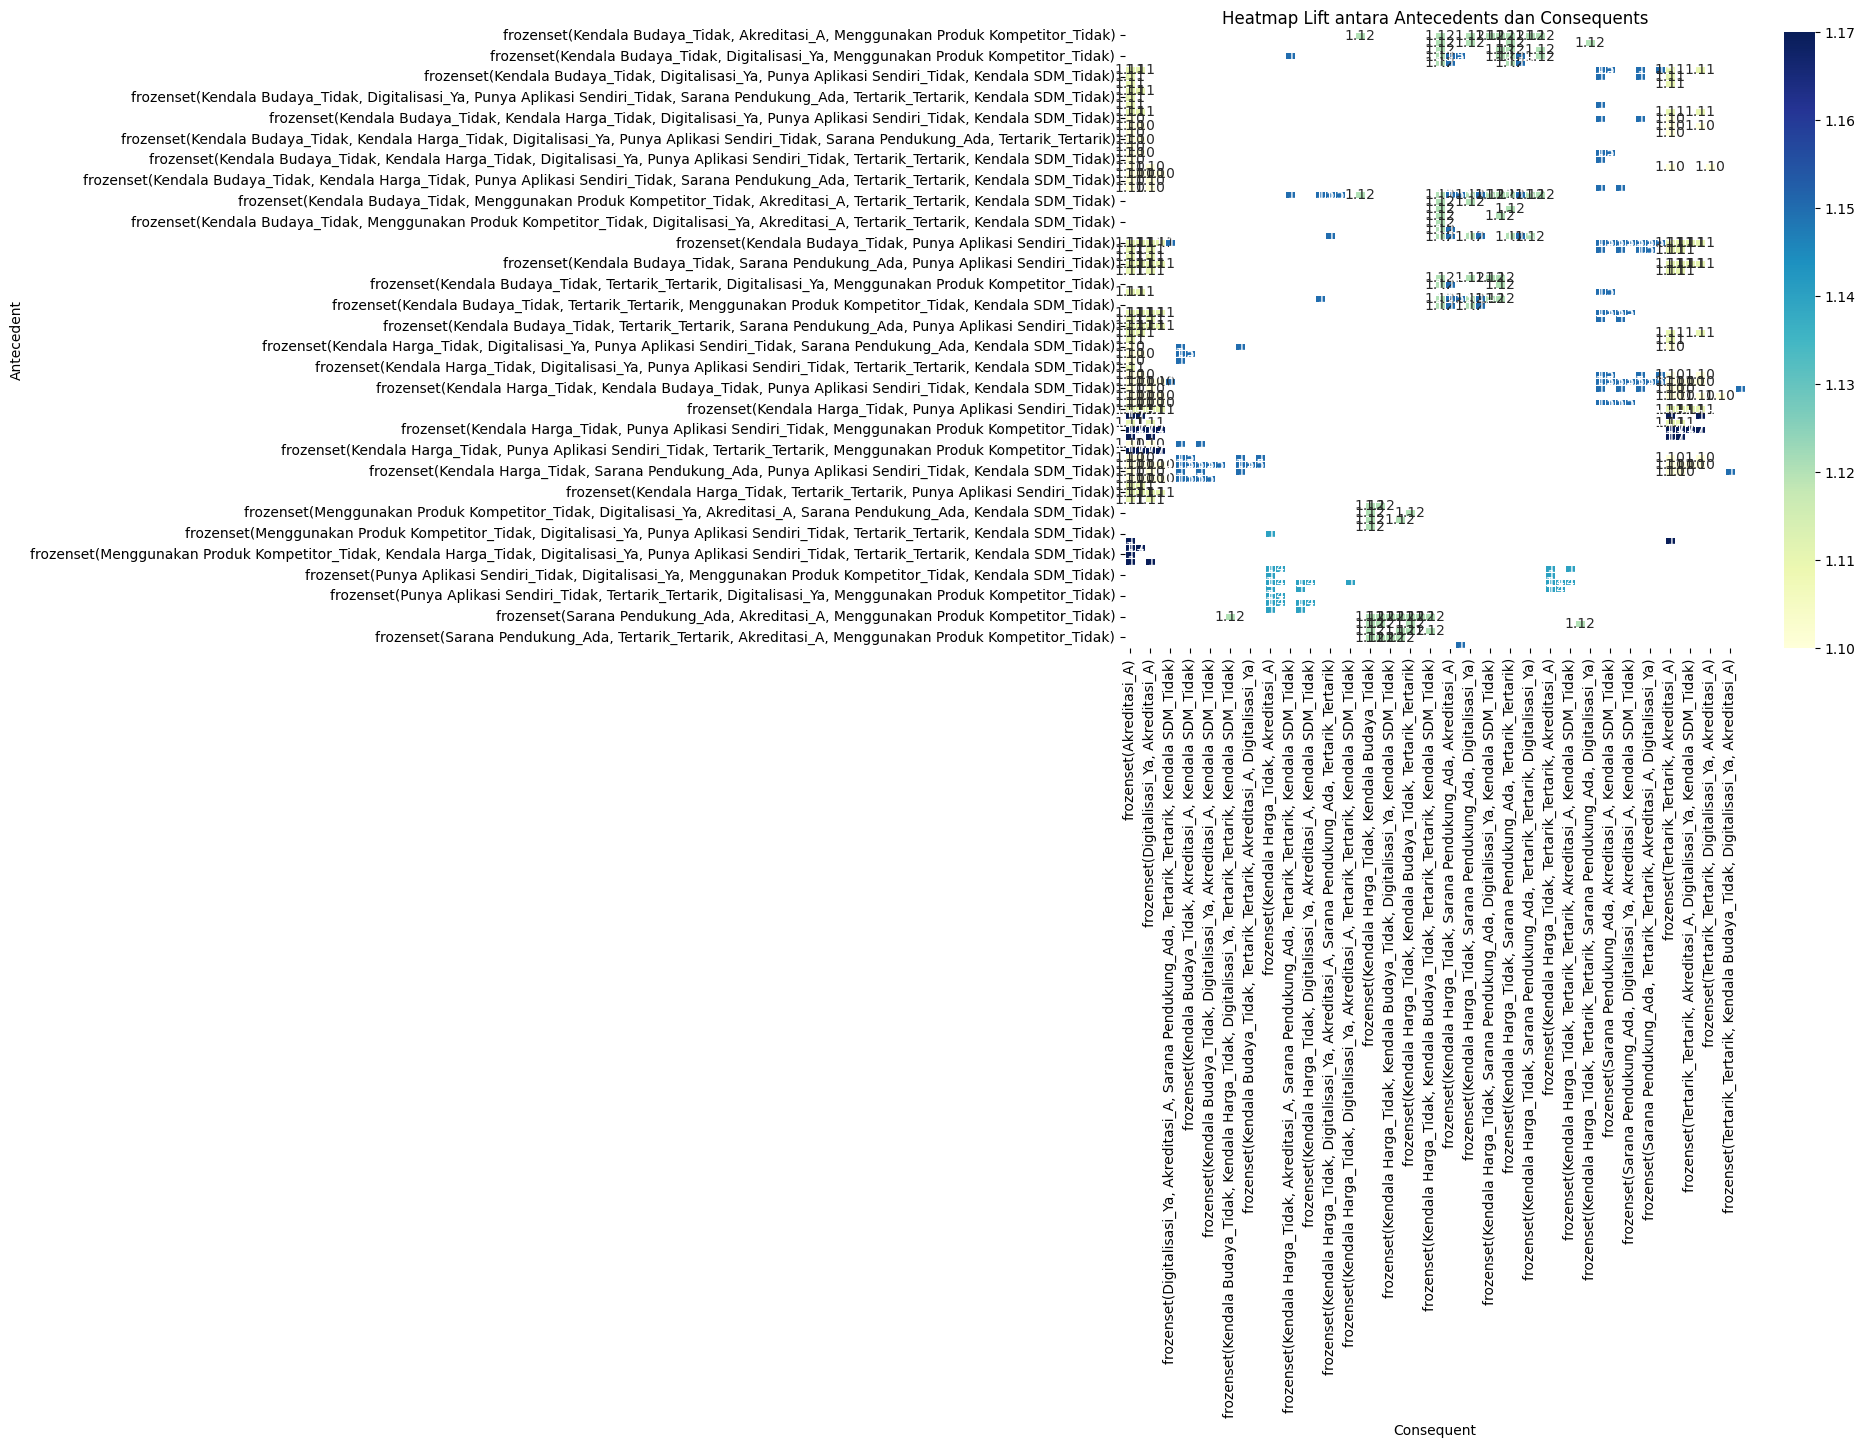

In [ ]:
# (Opsional) jika kolom antecedents dan consequents masih dalam format string literal set, ubah ke string biasa
apriori_results['antecedents'] = apriori_results['antecedents'].str.replace(r"[{}']", "", regex=True)
apriori_results['consequents'] = apriori_results['consequents'].str.replace(r"[{}']", "", regex=True)

# Pivot data
pivot_table = apriori_results.pivot_table(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Lift antara Antecedents dan Consequents')
plt.xlabel('Consequent')
plt.ylabel('Antecedent')
plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


2025-07-25 04:24:04.937 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.122 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-25 04:24:05.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 04:24:05.131 Thread 'MainThread': mi

DeltaGenerator()

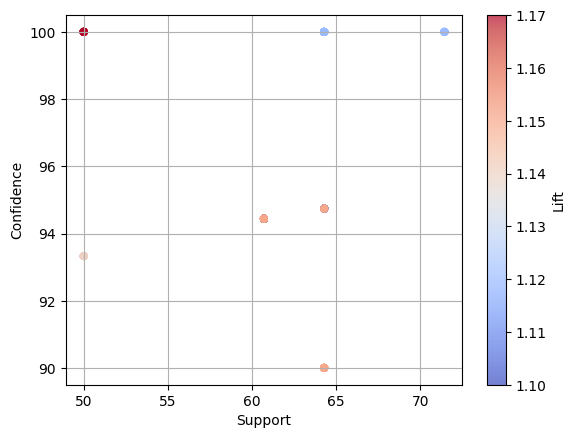

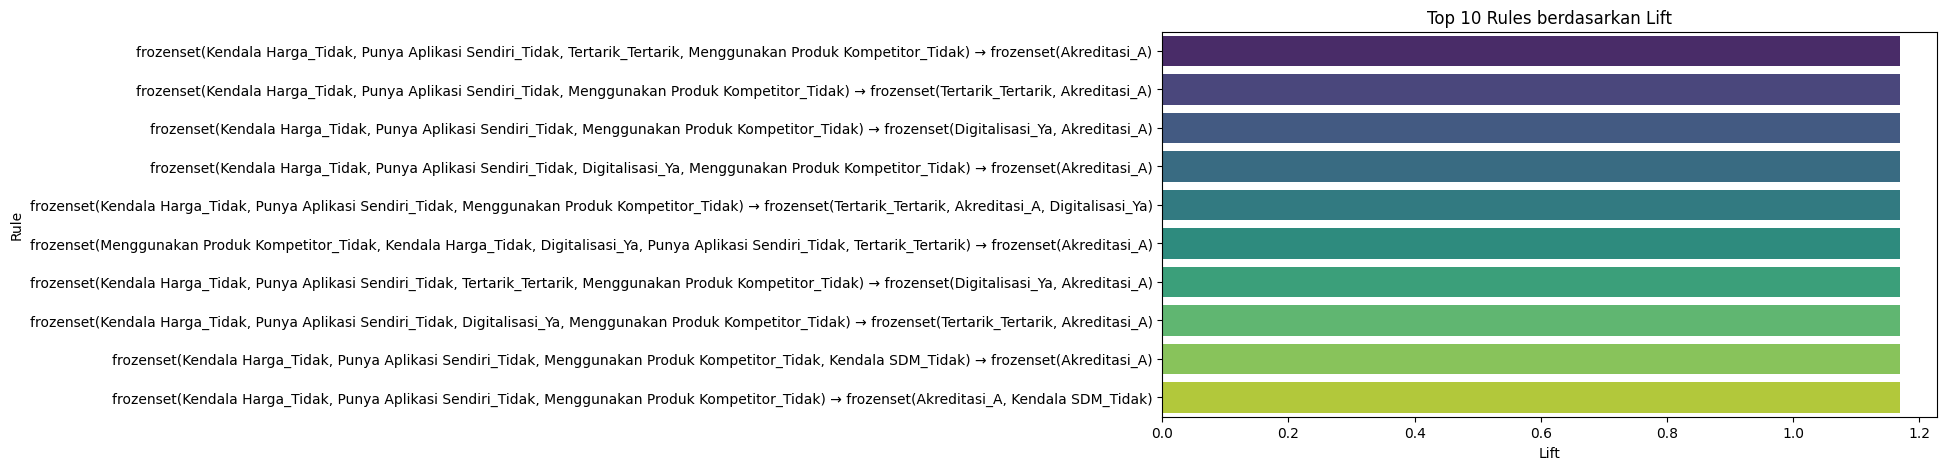

In [ ]:
# Install streamlit
!pip install streamlit

# Import streamlit
import streamlit as st

# Load dataset
df = pd.read_csv('hasil_3_support_conf_lift.csv')

# Bersihkan format kolom (jika format literal set)
df['antecedents'] = df['antecedents'].str.replace(r"[{}']", "", regex=True)
df['consequents'] = df['consequents'].str.replace(r"[{}']", "", regex=True)

# Judul Dashboard
st.title("📊 Dashboard Analisis Apriori (Association Rule Mining)")

# Sidebar filter
st.sidebar.header("🔎 Filter Aturan Asosiatif")
min_support = st.sidebar.slider("Support Minimum", 0.0, 1.0, 0.01, 0.01)
min_confidence = st.sidebar.slider("Confidence Minimum", 0.0, 1.0, 0.3, 0.01)
min_lift = st.sidebar.slider("Lift Minimum", 0.0, float(df['lift'].max()), 1.0, 0.1)

# Filter data berdasarkan input
filtered_df = df[
    (df['support'] >= min_support) &
    (df['confidence'] >= min_confidence) &
    (df['lift'] >= min_lift)
]

# Tampilkan data
st.subheader("📄 Aturan Asosiatif Terfilter")
st.dataframe(filtered_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Scatter Plot
st.subheader("📈 Scatter Plot: Support vs Confidence (Lift sebagai ukuran)")
fig, ax = plt.subplots()
scatter = ax.scatter(
    filtered_df['support'],
    filtered_df['confidence'],
    s=filtered_df['lift'] * 20,
    c=filtered_df['lift'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, ax=ax, label='Lift')
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.grid(True)
st.pyplot(fig)

# Barplot top lift
st.subheader("🏆 Top 10 Rules berdasarkan Lift")
top10 = filtered_df.sort_values(by='lift', ascending=False).head(10)
top10['rule'] = top10['antecedents'] + ' → ' + top10['consequents']

fig2, ax2 = plt.subplots(figsize=(10, 5))
sns.barplot(y='rule', x='lift', data=top10, palette='viridis', ax=ax2)
ax2.set_title("Top 10 Rules berdasarkan Lift")
ax2.set_xlabel("Lift")
ax2.set_ylabel("Rule")
st.pyplot(fig2)


/tmp/ipython-input-40-394927687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='Rule', x='lift', palette='Blues_d')
/tmp/ipython-input-40-394927687.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


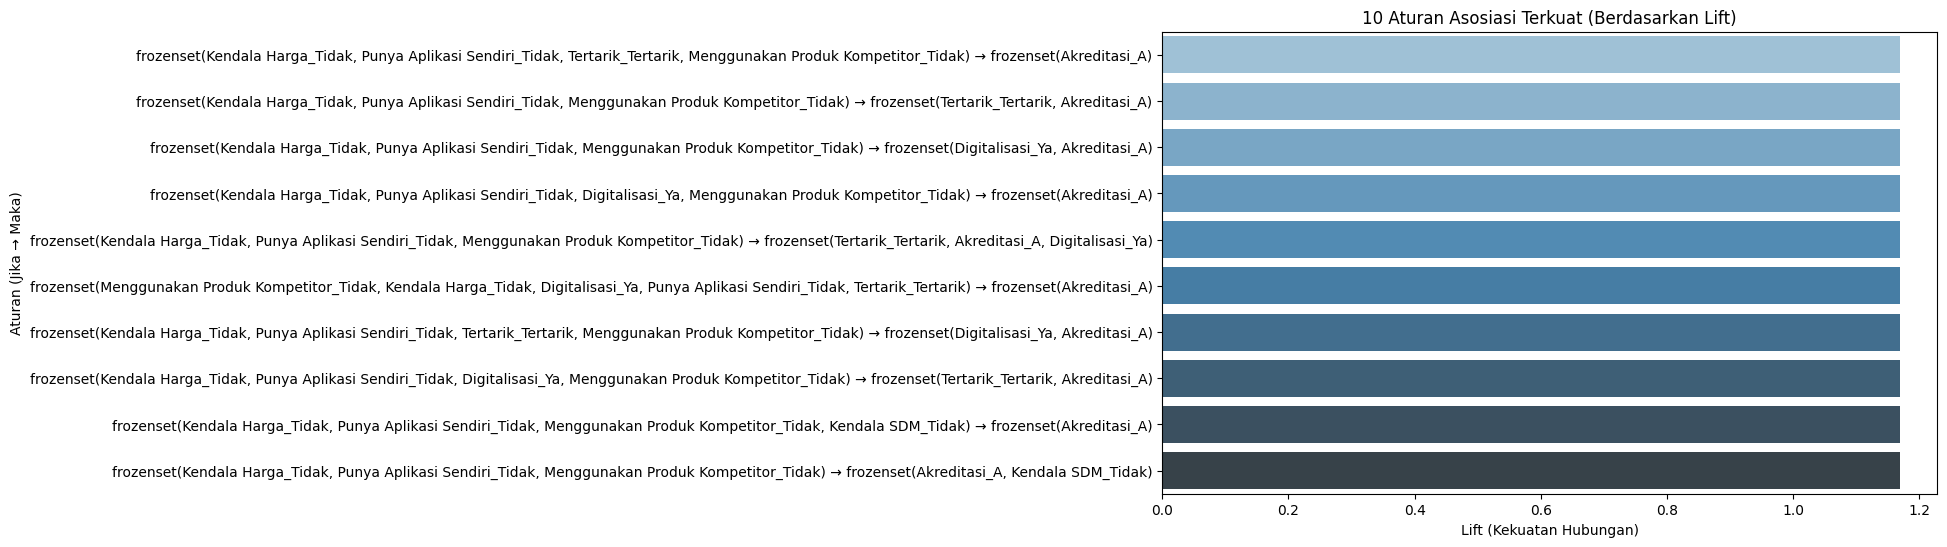

In [ ]:
# Load data
apriori_results = pd.read_csv('hasil_3_support_conf_lift.csv')

# Bersihkan format (hapus tanda kurung kurawal)
apriori_results['antecedents'] = apriori_results['antecedents'].str.replace(r"[{}']", "", regex=True)
apriori_results['consequents'] = apriori_results['consequents'].str.replace(r"[{}']", "", regex=True)

# Gabungkan menjadi satu aturan
apriori_results['Rule'] = apriori_results['antecedents'] + " → " + apriori_results['consequents']

# Ambil 10 aturan dengan lift tertinggi
top10 = apriori_results.sort_values(by='lift', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y='Rule', x='lift', palette='Blues_d')
plt.title('10 Aturan Asosiasi Terkuat (Berdasarkan Lift)')
plt.xlabel('Lift (Kekuatan Hubungan)')
plt.ylabel('Aturan (Jika → Maka)')
plt.tight_layout()
plt.show()


In [ ]:
for idx, row in top10.iterrows():
    print(f"Jika sekolah memiliki {row['antecedents']}, maka cenderung juga memiliki {row['consequents']} (Lift: {row['lift']:.2f})")


Jika sekolah memiliki frozenset(Kendala Harga_Tidak, Punya Aplikasi Sendiri_Tidak, Tertarik_Tertarik, Menggunakan Produk Kompetitor_Tidak), maka cenderung juga memiliki frozenset(Akreditasi_A) (Lift: 1.17)
Jika sekolah memiliki frozenset(Kendala Harga_Tidak, Punya Aplikasi Sendiri_Tidak, Menggunakan Produk Kompetitor_Tidak), maka cenderung juga memiliki frozenset(Tertarik_Tertarik, Akreditasi_A) (Lift: 1.17)
Jika sekolah memiliki frozenset(Kendala Harga_Tidak, Punya Aplikasi Sendiri_Tidak, Menggunakan Produk Kompetitor_Tidak), maka cenderung juga memiliki frozenset(Digitalisasi_Ya, Akreditasi_A) (Lift: 1.17)
Jika sekolah memiliki frozenset(Kendala Harga_Tidak, Punya Aplikasi Sendiri_Tidak, Digitalisasi_Ya, Menggunakan Produk Kompetitor_Tidak), maka cenderung juga memiliki frozenset(Akreditasi_A) (Lift: 1.17)
Jika sekolah memiliki frozenset(Kendala Harga_Tidak, Punya Aplikasi Sendiri_Tidak, Menggunakan Produk Kompetitor_Tidak), maka cenderung juga memiliki frozenset(Tertarik_Tertarik, A

In [ ]:
# list kosong untuk menampung hasil
hasil = []

# Loop dan masukkan data ke list
for idx, row in top10.iterrows():
    hasil.append({
        "Antecedents": ', '.join(row['antecedents']),
        "Consequents": ', '.join(row['consequents']),
        "Lift": round(row['lift'], 2)
    })

# Buat DataFrame dari list hasil
tabel_hasil = pd.DataFrame(hasil)

# Tampilkan tabel
tabel_hasil


,Antecedents,Consequents,Lift
0,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, A, k, r, e, d, i...",1.17
1,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, T, e, r, t, a, r...",1.17
2,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, D, i, g, i, t, a...",1.17
3,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, A, k, r, e, d, i...",1.17
4,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, T, e, r, t, a, r...",1.17
5,"f, r, o, z, e, n, s, e, t, (, M, e, n, g, g, u...","f, r, o, z, e, n, s, e, t, (, A, k, r, e, d, i...",1.17
6,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, D, i, g, i, t, a...",1.17
7,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, T, e, r, t, a, r...",1.17
8,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, A, k, r, e, d, i...",1.17
9,"f, r, o, z, e, n, s, e, t, (, K, e, n, d, a, l...","f, r, o, z, e, n, s, e, t, (, A, k, r, e, d, i...",1.17


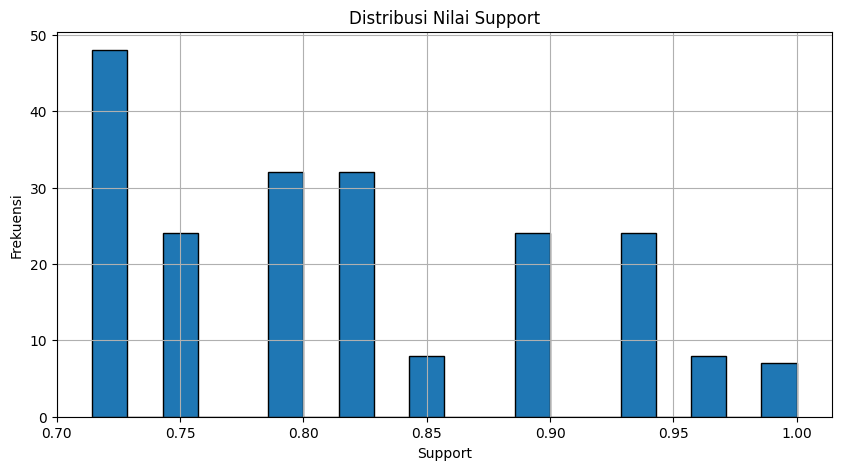

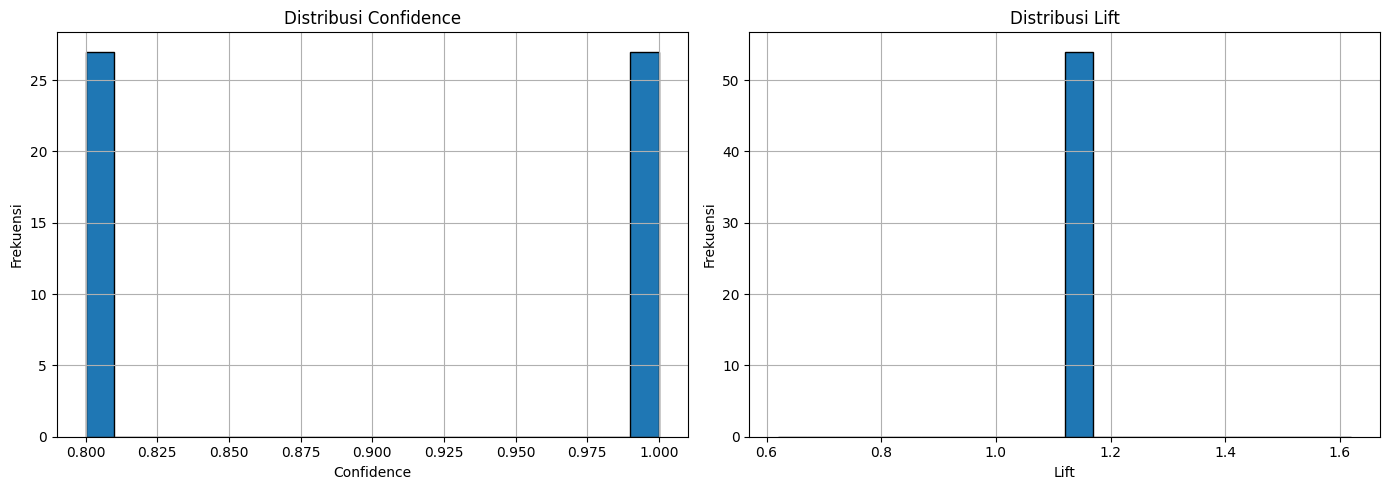

Ringkasan Nilai Support:
count    207.000000
mean       0.816425
std        0.085439
min        0.714286
25%        0.750000
50%        0.785714
75%        0.892857
max        1.000000
Name: support, dtype: float64

Ringkasan Nilai Confidence:
count    54.000000
mean      0.900000
std       0.100939
min       0.800000
25%       0.800000
50%       0.900000
75%       1.000000
max       1.000000
Name: confidence, dtype: float64

Ringkasan Nilai Lift:
count    5.400000e+01
mean     1.120000e+00
std      8.965183e-16
min      1.120000e+00
25%      1.120000e+00
50%      1.120000e+00
75%      1.120000e+00
max      1.120000e+00
Name: lift, dtype: float64


In [ ]:
# Load data
df = pd.read_csv('/content/cluster_0.csv')

# Kolom untuk apriori
selected_columns = ['Tertarik', 'Akreditasi', 'Digitalisasi', 'Menggunakan Produk Kompetitor',
                    'Punya Aplikasi Sendiri', 'Kendala Harga', 'Kendala SDM', 'Sarana Pendukung', 'Kendala Budaya']
df_apriori = df[selected_columns].copy()

# One-hot encoding
df_encoded = pd.get_dummies(df_apriori)

# 1. Cek distribusi support
support_values = apriori(df_encoded, min_support=0.7, use_colnames=True)
support_values['support_percent'] = (support_values['support'] * 100).round(2)

# Visualisasi distribusi support
plt.figure(figsize=(10, 5))
plt.hist(support_values['support'], bins=20, edgecolor='black')
plt.title('Distribusi Nilai Support')
plt.xlabel('Support')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# 2. Generate semua aturan asosiasi
rules_all = association_rules(support_values, metric="lift", min_threshold=1.1)

# Visualisasi distribusi confidence dan lift
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confidence
axes[0].hist(rules_all['confidence'], bins=20, edgecolor='black')
axes[0].set_title('Distribusi Confidence')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Frekuensi')
axes[0].grid(True)

# Lift
axes[1].hist(rules_all['lift'], bins=20, edgecolor='black')
axes[1].set_title('Distribusi Lift')
axes[1].set_xlabel('Lift')
axes[1].set_ylabel('Frekuensi')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 3. Statistik ringkasan
print("Ringkasan Nilai Support:")
print(support_values['support'].describe())

print("\nRingkasan Nilai Confidence:")
print(rules_all['confidence'].describe())

print("\nRingkasan Nilai Lift:")
print(rules_all['lift'].describe())
